# ADVANCED STATISTICS FOR PHYSICS ANALYSIS - Sixth Lab

### Student: Alessandro Marcomini (2024286)


### Date: May 23, 2021

## Exercise 1 - Radioactive emission
The number of particles emitted by a radioactive source during a fixed interval of time $(\Delta t = 10 \ s)$ follows a Poisson distribution on the parameter $\mu$. The number of particles observed during consecutive time intervals is: 4, 1, 3, 1 and 3

#### A. Suppose a uniform prior distribution for the parameter μ:
- determine and draw the posterior distribution for $\mu$, given the data;
- evaluate mean, median and variance, both analytically and numerically in R.

From the theory, it is known that a Poissonian process with uniform (improper) prior $g(\mu) = 1$ for $\mu>0$ leads to a Gamma posterior $\Gamma(\alpha, \lambda)$ after $n$ observations $\{x_k\}_{k=1..n}$ with parameters $\alpha = \sum_k x_k + 1$ and $\lambda = n$. Thus for this case: 

$$
\alpha = (4+1+3+1+3) + 1 = 13 \mbox{ , } \lambda = 5  \implies
P(\mu|\{x_k\}_k,M) = \Gamma(13,5)
$$

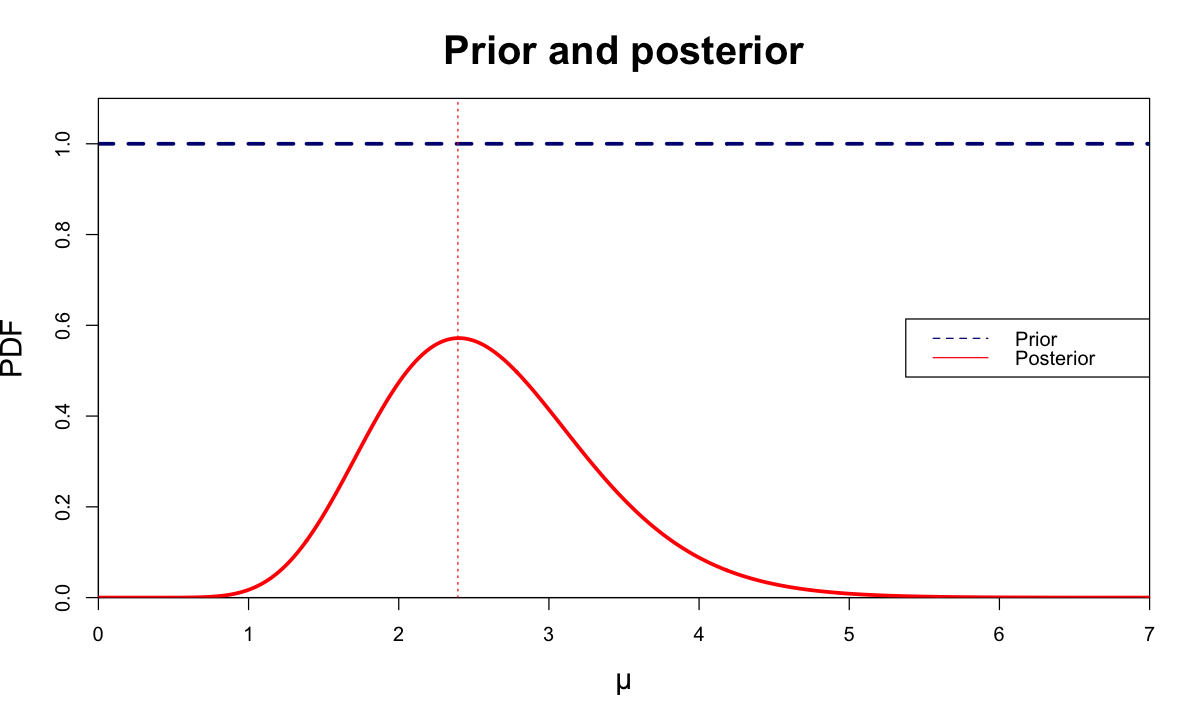

In [1]:
#Define parameters
xmin = 0
xmax = 7
len = 501
x = seq(xmin,xmax,len=len)
alpha.u = 13
lambda.u = 5

#Define pdfs
prior <- rep(1,len)
post <- dgamma(x,shape=alpha.u, rate=lambda.u)

#Plot
options(repr.plot.width=10, repr.plot.height=6)
plot(x,prior,xaxs='i',yaxs='i',ylim=c(0,1.1),ylab='PDF',
     xlab='µ',main='Prior and posterior', cex.lab=1.5, cex.main=2,
     col='navy',type='l', lty = 2, lwd = 3)
par(new=TRUE)
plot(x,post,ylim=c(0,1.1),xaxs='i',yaxs='i',col='red',type='l', lty = 1, lwd = 3, axes=FALSE, ann=FALSE)
abline(v=x[which.max(post)],lty=3,col='red')
legend('right', c('Prior','Posterior'), col=c("navy", "red"), lty=2:1)

The plot above shows how starting from a flat prior after some observations the posterior evolves towards a peaked shape.

As for the determination of statistical quantities, from the theory of Gamma distributions:

$$
mean = \frac{\alpha}{\lambda} = 13/5 = 2.6
$$
$$
mode = \frac{\alpha-1}{\lambda} = 12/5 = 2.4
$$
$$
median = 2.534^*
$$
$$
variance = \frac{\alpha}{\lambda^2} = 13/25 = 0.52
$$

$^*$No analytic formula for this: estimation made by quantile function of Gamma in R (see below).

In [2]:
median.qgamma = qgamma(0.5,shape=alpha.u, rate=lambda.u)
print(paste('Median with quantile function:', median.qgamma))

[1] "Median with quantile function: 2.53364581174773"


Moving to numerical analysis instead:

In [3]:
#Set bin width
dx = (xmax-xmin)/len

#Calculate quantities from discrete computation
mean = sum(x*post)*dx
print(paste('Numerical mean estimation:', mean))
mode = x[which.max(post)]
print(paste('Numerical mode estimation:', mode))
median = x[which.min(abs(cumsum(post)*dx-0.5))]
print(paste('Numerical median estimation:', median))
variance = sum(x**2*post)*dx - mean**2
print(paste('Numerical variance estimation:', variance))

[1] "Numerical mean estimation: 2.59476316897966"
[1] "Numerical mode estimation: 2.394"
[1] "Numerical median estimation: 2.534"
[1] "Numerical variance estimation: 0.532327986095258"


Comparing the previous result with the ones given by the theory, the compatibility is great with some slight differences due to the finite number of discretization points.

#### B. suppose a Jeffreys' prior for the parameter $\mu$
- determine and draw the posterior distribution for $\mu$, given the data;
- evaluate mean, median and variance, both analytically and numerically in R.

Recall that for a Poissonian process the Jeffreys' (improper) prior is $g(\mu) = \mu^{-1/2}$ for $\mu>0$ which, combined with the likelihood, leads to a Gamma posterior $\Gamma(\alpha,\lambda)$ after $n$ observations $\{x_k\}_{k=1..n}$ with parameters $\alpha = \sum_k x_k + \tfrac{1}{2}$ and $\lambda = n$.
Hence: 

$$
\alpha = (4+1+3+1+3) + \frac{1}{2} = 12.5 \mbox{ , } \lambda = 5  \implies
P(\mu|\{x_k\}_k,M) = \Gamma(12.5,5)
$$

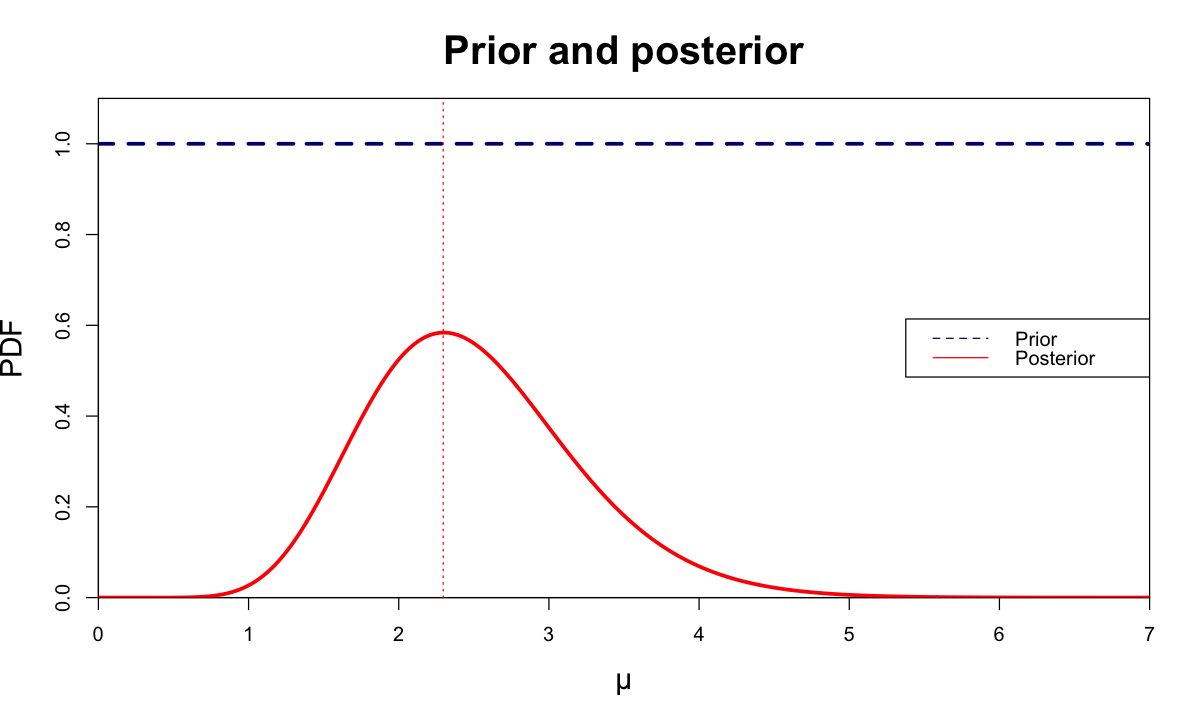

In [4]:
#Set parameters
xmin = 0
xmax = 7
len = 501
x = seq(xmin,xmax,len=len)
alpha.j = 12.5
lambda.j = 5

#Define pdfs
prior <- rep(1,len)
post <- dgamma(x,shape=alpha.j, rate=lambda.j)

#Plot
plot(x,prior,xaxs='i',yaxs='i',ylim=c(0,1.1),ylab='PDF',
     xlab='µ',main='Prior and posterior', cex.lab=1.5, cex.main=2,
     col='navy',type='l', lty = 2, lwd = 3)
par(new=TRUE)
plot(x,post,ylim=c(0,1.1),xaxs='i',yaxs='i',col='red',type='l', lty = 1, lwd = 3, axes=FALSE, ann=FALSE)
abline(v=x[which.max(post)],lty=3,col='red')
legend('right', c('Prior','Posterior'), col=c("navy", "red"), lty=2:1)

Again, the situation is similar to the one of the previous point.
As for the determination of statistical quantities I proceed as above:

$$
mean = \frac{\alpha}{\lambda} = 12.5/5 = 2.5
$$
$$
mode = \frac{\alpha-1}{\lambda} = 11.5/5 = 2.3
$$
$$
median = 2.434^*
$$
$$
variance = \frac{\alpha}{\lambda^2} = 12.5/25 = 0.5
$$

$^*$No analytic formula for this: estimation made by quantile function of Gamma in R (see below).

In [5]:
median.qgamma = qgamma(0.5,shape=alpha.j, rate=lambda.j)
print(paste('Median with quantile function:', median.qgamma))

[1] "Median with quantile function: 2.43365866978843"


Moving to numerical analysis:

In [6]:
#Set bin width
dx = (xmax-xmin)/len

#Calculate quantities from discrete computation
mean = sum(x*post)*dx
print(paste('Numerical mean estimation:', mean))
mode = x[which.max(post)]
print(paste('Numerical mode estimation:', mode))
median = x[which.min(abs(cumsum(post)*dx-0.5))]
print(paste('Numerical median estimation:', median))
variance = sum(x**2*post)*dx - mean**2
print(paste('Numerical variance estimation:', variance))

[1] "Numerical mean estimation: 2.49498263231199"
[1] "Numerical mode estimation: 2.296"
[1] "Numerical median estimation: 2.422"
[1] "Numerical variance estimation: 0.511388819007526"


Again, the compatibility between the numberical estimation and the theory is quite good taking into account some tolerance due to the finite length of the discretized interval.

#### C. Evaluate a $95\%$ credibility interval for the results obtained with both priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

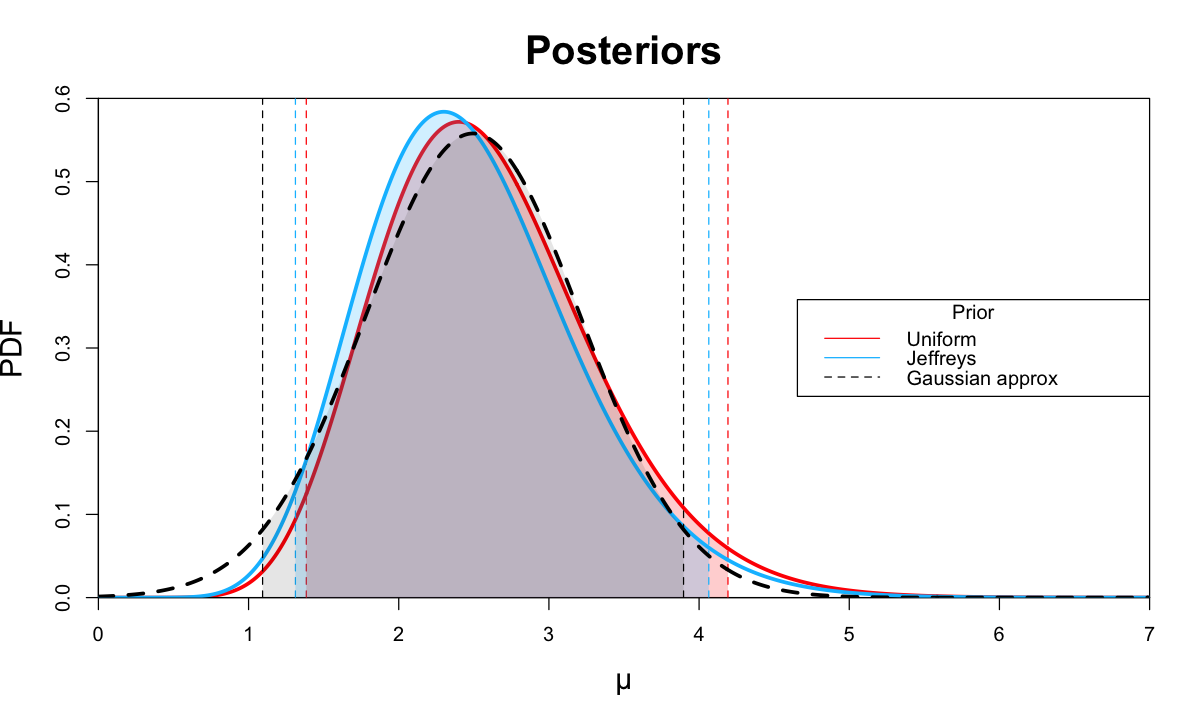

In [7]:
len.ci = floor(len*0.95)

#Flat prior
q = 0.025
min.ci.u = qgamma(q, shape=alpha.u, rate=lambda.u)
max.ci.u = qgamma(1-q, shape=alpha.u, rate=lambda.u)
ci.u = seq(min.ci.u,max.ci.u,len=len.ci)

#Jeffreys prior
q = 0.025
min.ci.j = qgamma(q, shape=alpha.j, rate=lambda.j)
max.ci.j = qgamma(1-q, shape=alpha.j, rate=lambda.j)
ci.j = seq(min.ci.j,max.ci.j,len=len.ci)

#Gaussian approx
gauss.approx <- dnorm(x, mean, sqrt(variance))
min.ci.g = qnorm(q, mean, sqrt(variance))
max.ci.g = qnorm(1-q, mean, sqrt(variance))
ci.g = seq(min.ci.g,max.ci.g,len=len.ci)

#Plot
ylim = c(0,0.6)
plot(x,dgamma(x, shape=alpha.u, rate=lambda.u),xaxs='i',yaxs='i',ylim=ylim,ylab='PDF',
     xlab='µ',main='Posteriors', cex.lab=1.5, cex.main=2,
     col='red',type='l', lty = 1, lwd = 3)
polygon(c(ci.u ,max.ci.u, min.ci.u), c(dgamma(ci.u, alpha.u, lambda.u), 0, 0), 
        col=adjustcolor("red",alpha.f=0.2), bor=NA)
abline(v = max.ci.u, col='red', lty = 2, lwd = 1)
abline(v = min.ci.u, col='red', lty = 2, lwd = 1)
par(new=TRUE)
plot(x,dgamma(x, shape=alpha.j, rate=lambda.j),ylim=ylim,xaxs='i',yaxs='i',col='deepskyblue',
     type='l', lty = 1, lwd = 3, axes=FALSE, ann=FALSE)
polygon(c(ci.j ,max.ci.j, min.ci.j), c(dgamma(ci.j, alpha.j, lambda.j), 0, 0), 
        col=adjustcolor("deepskyblue",alpha.f=0.2), bor=NA)
abline(v = max.ci.j, col='deepskyblue', lty = 2, lwd = 1)
abline(v = min.ci.j, col='deepskyblue', lty = 2, lwd = 1)
par(new=TRUE)
plot(x,gauss.approx,ylim=ylim,xaxs='i',yaxs='i',col='black',
     type='l', lty = 2, lwd = 3, axes=FALSE, ann=FALSE)
polygon(c(ci.g ,max.ci.g, min.ci.g), c(dnorm(ci.g, mean, sqrt(variance)), 0, 0), 
        col=adjustcolor("black",alpha.f=0.1), bor=NA)
abline(v = max.ci.g, col='black', lty = 2, lwd = 1)
abline(v = min.ci.g, col='black', lty = 2, lwd = 1)
legend('right', c('Uniform','Jeffreys','Gaussian approx'), 
       col=c("red","deepskyblue","black"), lty=c(1,1,2), title = 'Prior', cex=1)

Above I plotted the two posteriors together with a gaussian approximation for the Jeffreys case. As the plot suggests, the three distributions are not so different but the credibility intervals change noticeably.

## Exercise 2 - The problem of the lighthouse

#### Problem definition

The problem of the lighthouse is described as follows: suppose to be on a straing seashore and see at some distance inside the sea a lighthouse, which emits highly collimated flashes of light at a certain rate in a certain direction. The emission rate $\eta$ is constant, but the continuous rotating of the direction at a specific angular velocity makes the flashes reach the shore at some distibuted random positions $\{x_k\}_k$, where those positions are calculated w.r.t. the normal projection of the position of the lighthouse on the shore ($\alpha$). Named the normal distance $\beta$, those positions follow the relation $\alpha - x_k = \beta \cdot \tan(\theta_k)$, where the angle is indicated in the following scheme. The problem to be solved is, given a set of observations $\{x_k\}_k$, infere the parameters $\alpha$ and $\beta$.

![title](Lighthouse.png)

#### A. Given the problem of the lightouse, study the case in which both the position along the shore ($\alpha$) and the distance out ta sea ($\beta$) are unknown

From the theory above, it looks reasonable that all $\{\theta_k\}_k$ follow a uniform distribution:

$$
P(\theta_k|\alpha,\beta) = \frac{1}{\pi}
$$

And given the parametric relation between $x_k$ and $\theta_k$ it is possible to operate a change of variables as follows:

$$
\left\{ \begin{array}{2}
x_k = \beta \tan(\theta_k) + \alpha \\
dx_k = \beta\tfrac{d\tan(\theta_k)}{d\theta_k}d\theta_k = \beta \left(1+\tan^2(\theta_k)\right)d\theta_k
\end{array} \right.
\implies \left| \frac{dx_k}{d\theta_k}\right| = \beta \left(1+\tan^2(\theta_k)\right) = \beta\left[ 1 + \frac{(x_k-\alpha)^2}{\beta^2} \right] = \frac{\beta^2 + (x_k-\alpha)^2}{\beta}
$$

From this it is straightforward to estimate the distribution for the new variables $x_k$, taking care of multiplying for the determinant of the Jacobean in order to preserve the probability density:

$$
P(x_k|\alpha,\beta) = P(\theta_k|\alpha,\beta)\left| \frac{d\theta_k}{dx_k}\right| = \frac{1}{\pi}\frac{\beta}{\beta^2 + (x_k-\alpha)^2}
$$

This latter expression is a Cauchy distribution, which is symmetric w.r.t. the maximum value $\alpha$ and has a FWHM of $2\beta$.

#### Data generation

In order to proceed to an effective analysis, I need some data to start the estimation process. To do so, I impose some true values for the parameters $\alpha, \beta$ which will have to be inferred in the successive sections.

In [8]:
#Function to generate observed data.
data_generator <- function(n.flashes, a.true, b.true, eta = 1){
    
    # Note: out of n.flashes flashes emitted by the lighthouse, 
    # on average only half will be directed towards the shore.
    
    theta.obs = cumsum(rep(1,n.flashes)/eta)                    #Generate emission angles 
    theta.obs = theta.obs[-which(theta.obs%%(2*pi)>pi)]         #Keep only flashes reaching the shore
    x.obs = b.true*tan(theta.obs) + a.true                      #Calculate arrival positions
    
}

#### Model definition

Given the fact that both $\alpha$ and $\beta$ are unknown, it is necessary to make assumptions on their distributions. First of all, since the distance of the lighthouse from the sea does not condition its relative position on the shore, it seems reasonable to assume that they are independent variables. Hence, their joint prior is just the product of the two prior distributions: $P(\alpha, \beta) = P(\alpha)P(\beta)$. As for those, given the fact that I have no idea about what should be the most probable value for those parameters, I express my maximum ignorance about their distribution by choosing for both of them a flat prior with some reasonable (yet large) boundaries: $P(\alpha) = 1/(\alpha_{max}-\alpha_{min})$, $P(\beta) = 1/(\beta_{max}-\beta_{min})$. 

As for the likelihood, it is worth noticing that assuming there are multiple photo-detectors covering the whole shore the event detection of one of those is completely uncorrelated from any other event detection of others. This allows to factorize the joint likelihood of the whole set of observations into the product of the single-event likelihoods. 

Summing up, the result is as follows:

$$
P(\alpha, \beta| \left\{x_k \right\}_k) = P(\left\{x_k \right\}_k | \alpha, \beta) \cdot P(\alpha, \beta) = \left(\prod_k P(x_k | \alpha, \beta)\right) \cdot P(\alpha)P(\beta) = \left(\prod_k \frac{1}{\pi} \frac{\beta}{\beta^2 + (x_k-\alpha)^2}\right) \cdot \frac{1}{(\alpha_{max}-\alpha_{min})(\beta_{max}-\beta_{min})}
$$

In particular, taking the logarithm of the expression above it results:

$$
L := \log\left(P(\alpha, \beta| \left\{x_k \right\}_k)\right) = \log\left( \prod_k \frac{1}{\pi} \frac{\beta}{\beta^2 + (x_k -\alpha)^2} \right) + C = \sum_k \log\left(\frac{1}{\pi}\frac{\beta}{\beta^2 + (x_k -\alpha)^2} \right) + C
$$

Where C is a constant value (independent on $\alpha$ and $\beta$). The latter expression is convenient to have a numeric estimation of the posterior, given an observation dataset $\left\{x_k \right\}_k$.

Finally, it is sufficient to reconstruct the posterior pdf as $P(\alpha, \beta| \left\{x_k \right\}_k) = \exp(L)$, with proper normalization:

$$
1 \overset{!}{=}
\iint P(\alpha, \beta| \left\{x_k \right\}_k) \ d\alpha \ d\beta \approx \sum_{\alpha}\sum_{\beta}P(\alpha, \beta| \left\{x_k \right\}_k) \Delta\alpha\Delta\beta = \sum_{\alpha}\sum_{\beta}P(\alpha, \beta| \left\{x_k \right\}_k) \left( \frac{\alpha_{max}-\alpha_{min}}{n_{\alpha}}\right)\left(\frac{\beta_{max}-\beta_{min}}{n_{\beta}} \right)
$$
$$
\implies \sum_{\alpha}\sum_{\beta}P(\alpha, \beta| \left\{x_k \right\}_k) \overset{!}{=} \frac{n_{\alpha}n_{\beta}}{(\alpha_{max}-\alpha_{min})(\beta_{max}-\beta_{min})} = \frac{1}{\Delta\alpha\Delta\beta}
$$

#### Numeric analysis

I now proceed to the computation and plot of the posterior for different number of observations. 

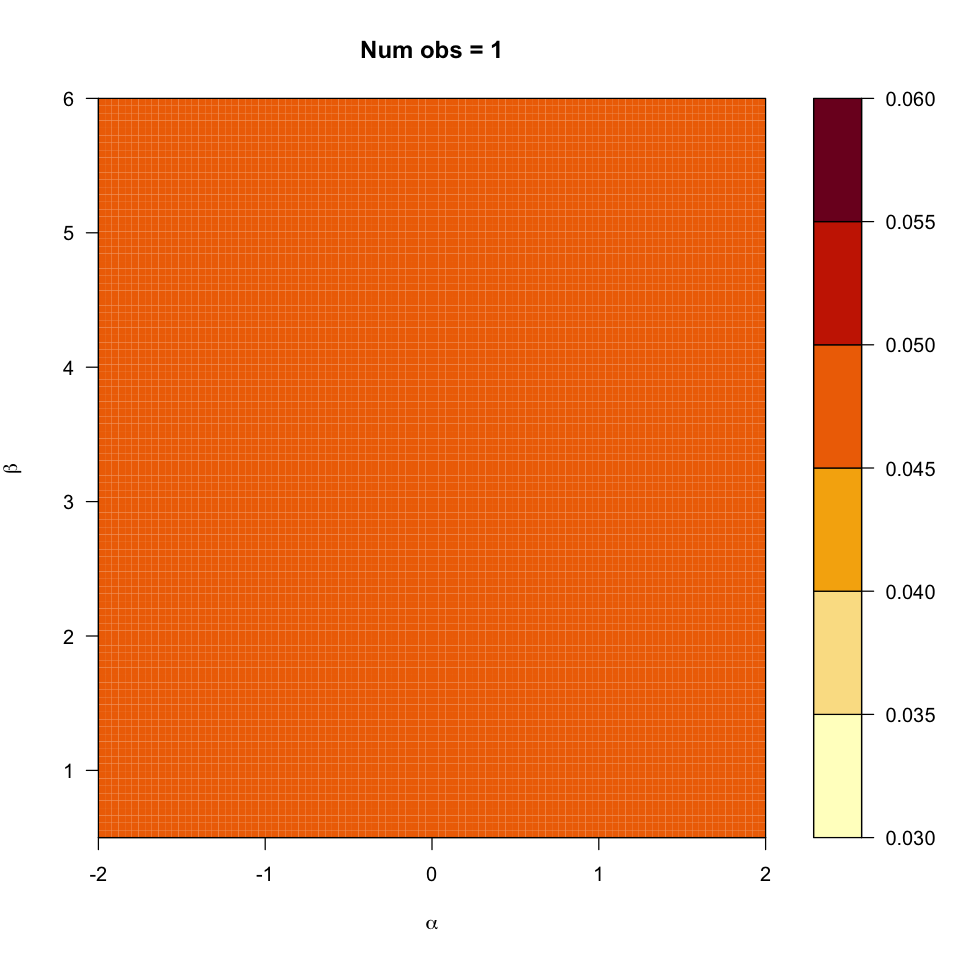

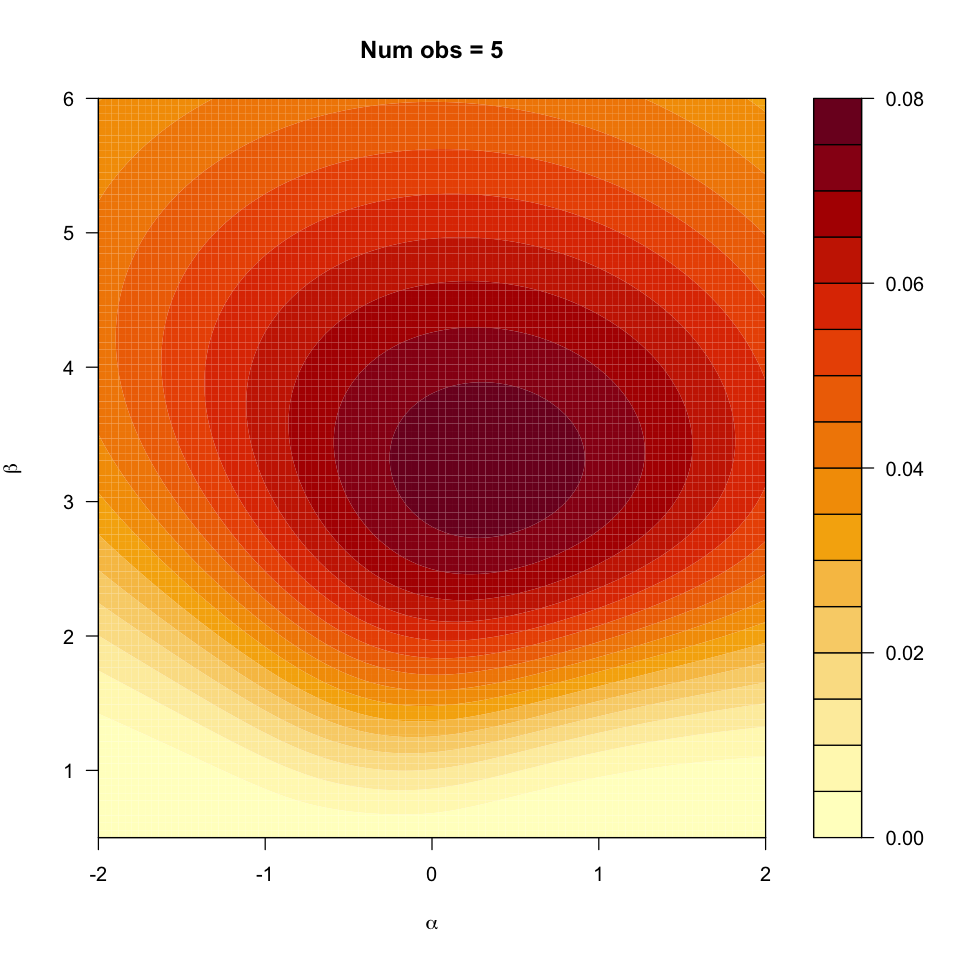

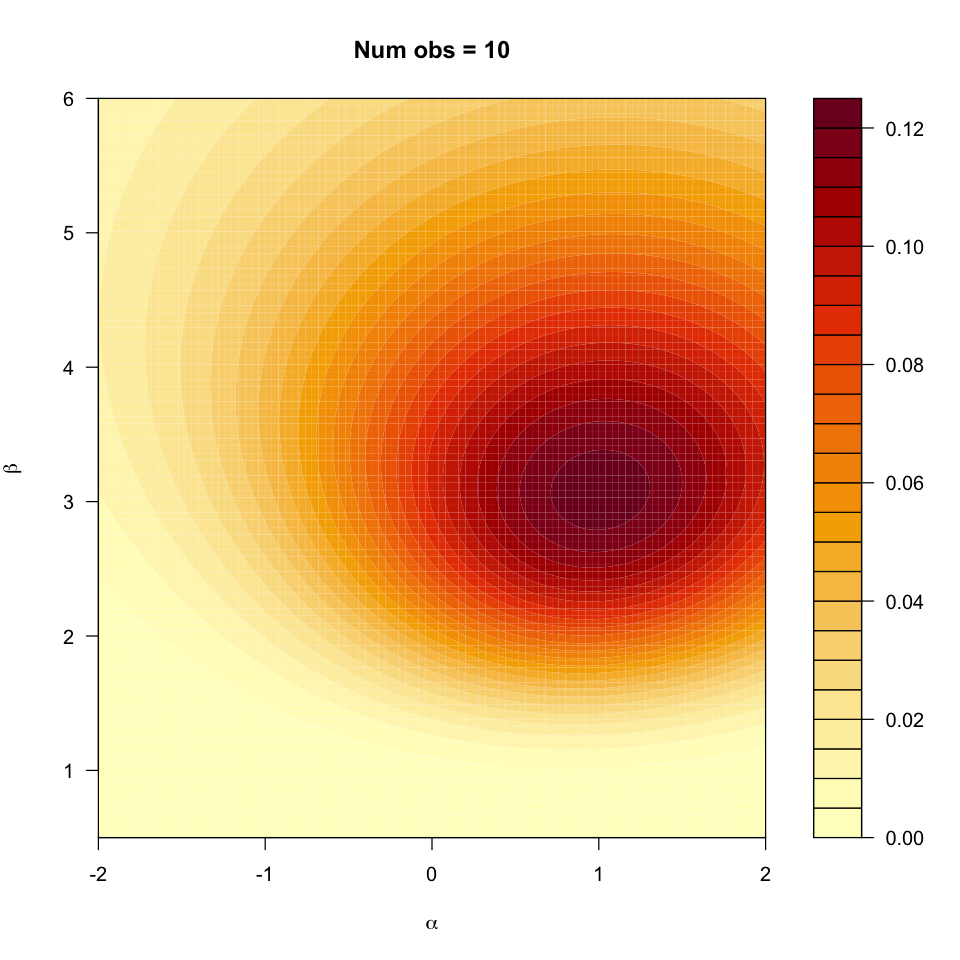

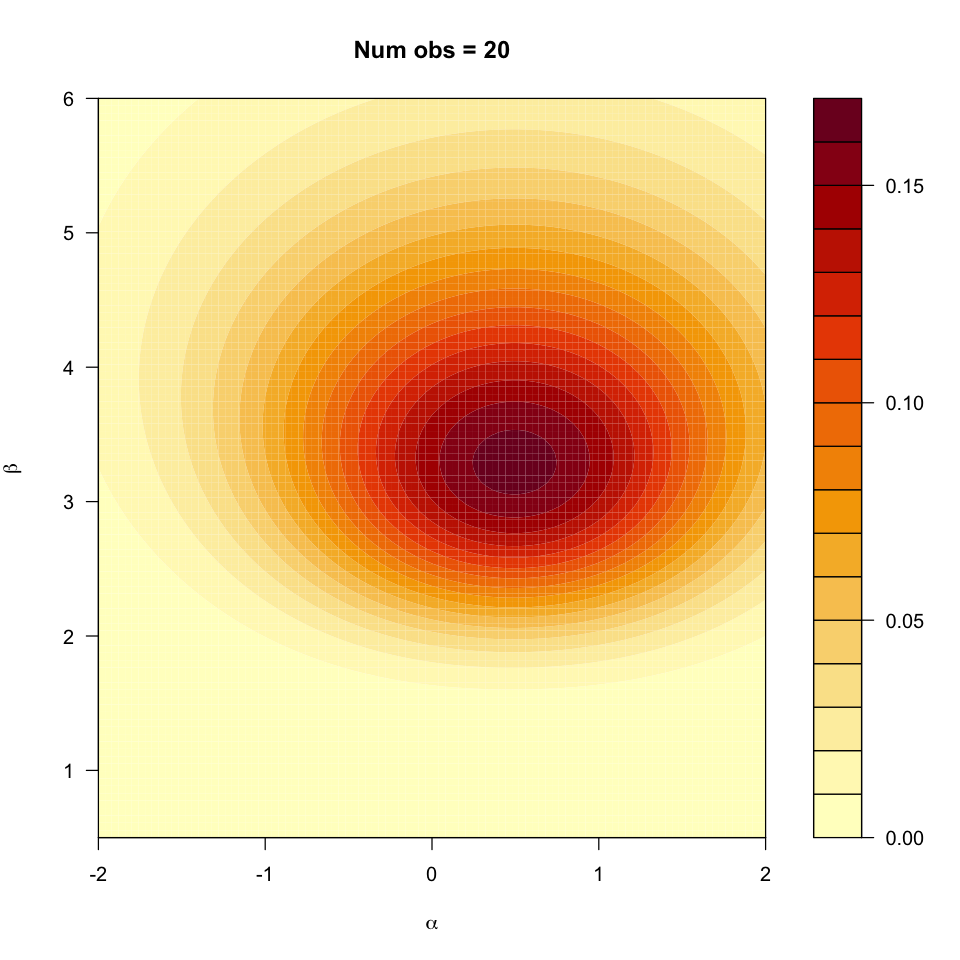

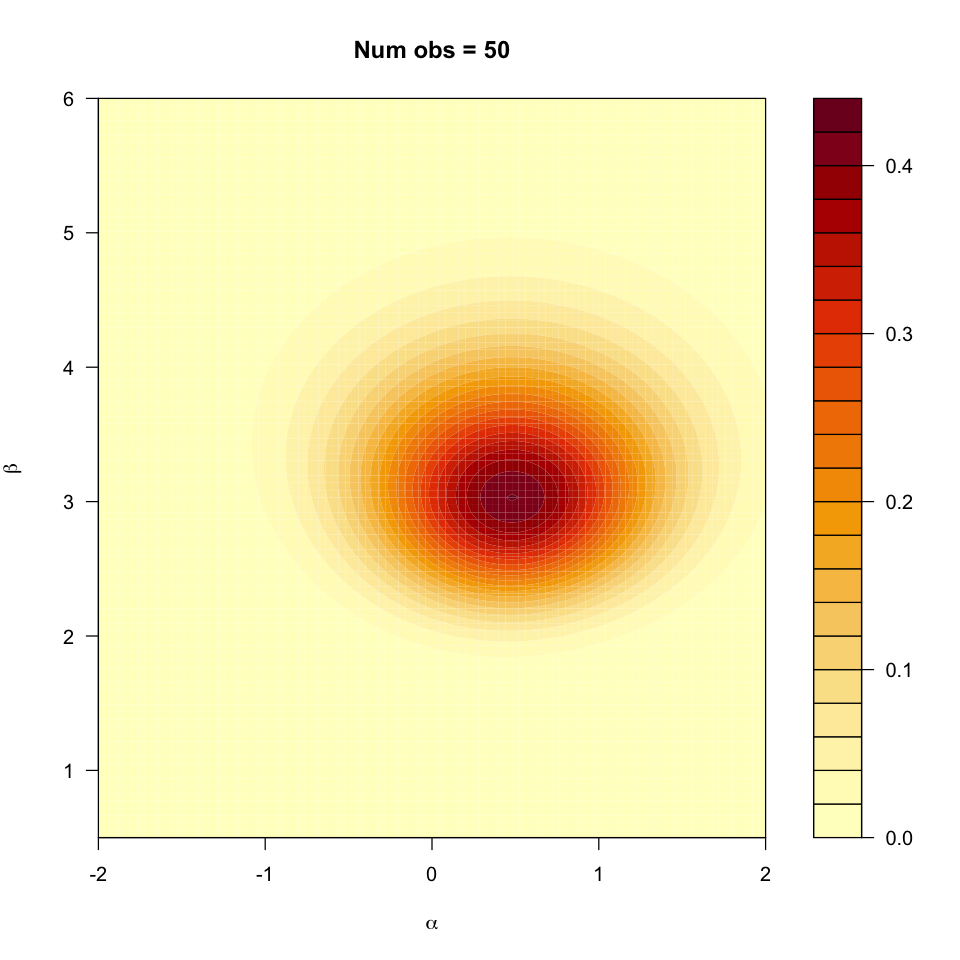

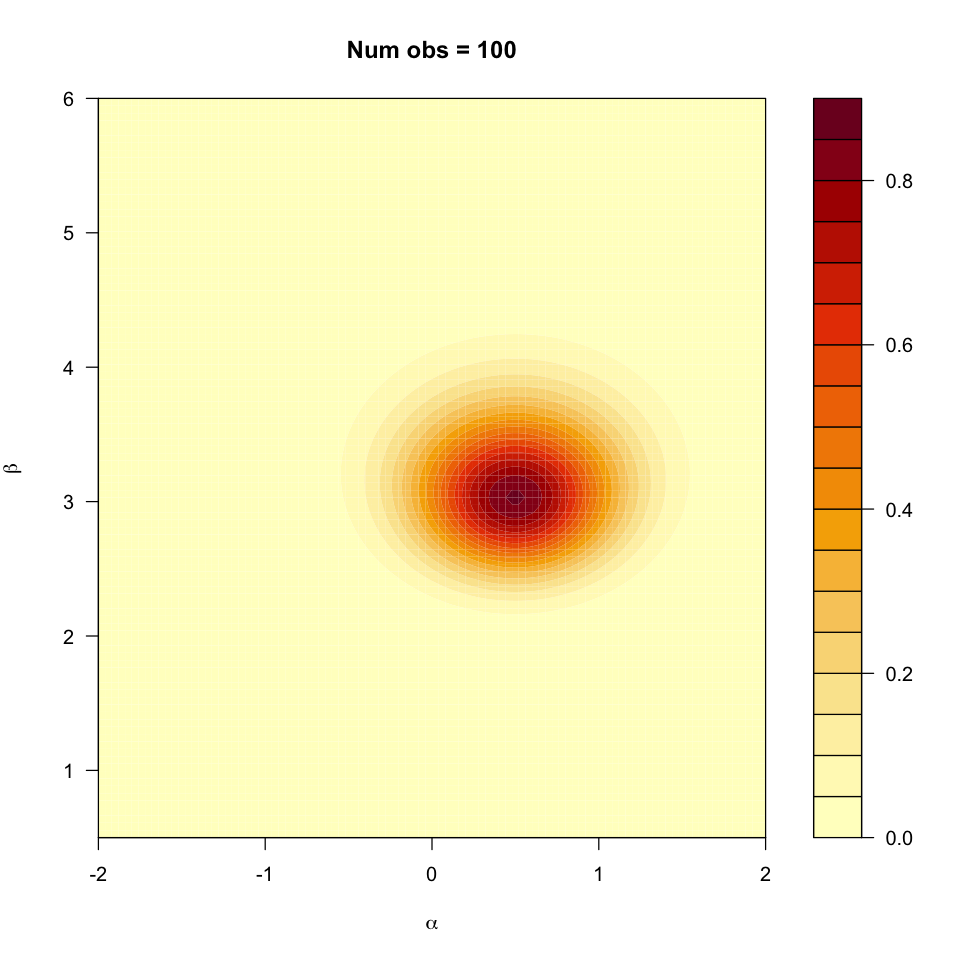

In [9]:
options(repr.plot.width=8, repr.plot.height=8)
n.obs.list = c(1,5,10,20,50,100)

#True vals
a.true = 0.5
b.true = 3

#Prior distributions
a.min = -2
a.max = 2
len.a = 101
da = (a.max-a.min)/len.a
A = seq(a.min,a.max,len=len.a)
b.min = 0.5
b.max = 6
len.b = 101
db = (b.max-b.min)/len.b
B = seq(b.min,b.max,len=len.b)

a.prior = 1/(a.max-a.min)
b.prior = 1/(b.max-b.min)

#Loop over n.obs
best.est.list <- vector()
a.post.list <- vector() 
b.post.list <- vector() 

for (n.obs in n.obs.list){

    x.obs = data_generator(2*n.obs, a.true, b.true)
    L.matrix <- vector()

    #Update matrix of log posteriors
    for (a in A){
        for (b in B){
            L = sum(log(dcauchy(x.obs,a,b)))
            L.matrix <- cbind(L.matrix,L)
        }
    }
    
    #From L to Posterior (on the grid)
    post.matrix <- exp(L.matrix)/(sum(exp(L.matrix))*da*db)
    post.matrix <- matrix(post.matrix, nrow = len.a, byrow = TRUE)
    
    #Save best params estimations and plot
    best.idx = which(post.matrix == max(post.matrix), arr.ind = TRUE)
    best.est.list <- cbind(best.est.list,c(A[best.idx[1]],B[best.idx[2]]))
    a.post.list <- cbind(a.post.list,rowSums(post.matrix)*db)
    b.post.list <- cbind(b.post.list,colSums(post.matrix)*da)
    filled.contour(A, B, post.matrix, plot.title = title(main = paste('Num obs =', n.obs), 
                    xlab=expression(alpha),  ylab=expression(beta)))

}

From the plot above it looks clear that while the number of observations increases the posterior moves from a flat distribution to a more and more peaked distribution which narrows on the true parameters used to generate the samples (in the last plot above, the mode of the posterior is in correspondence with $\alpha=0.5,\beta = 3$).

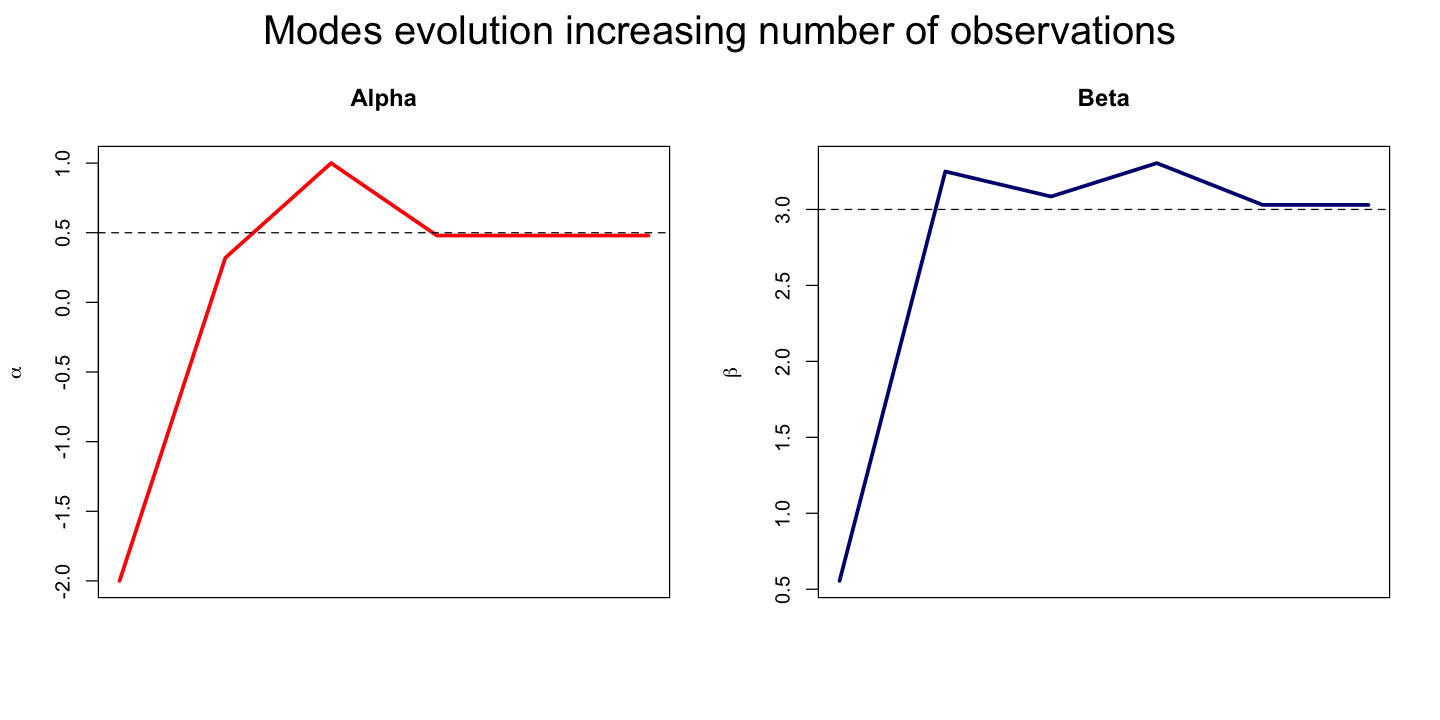

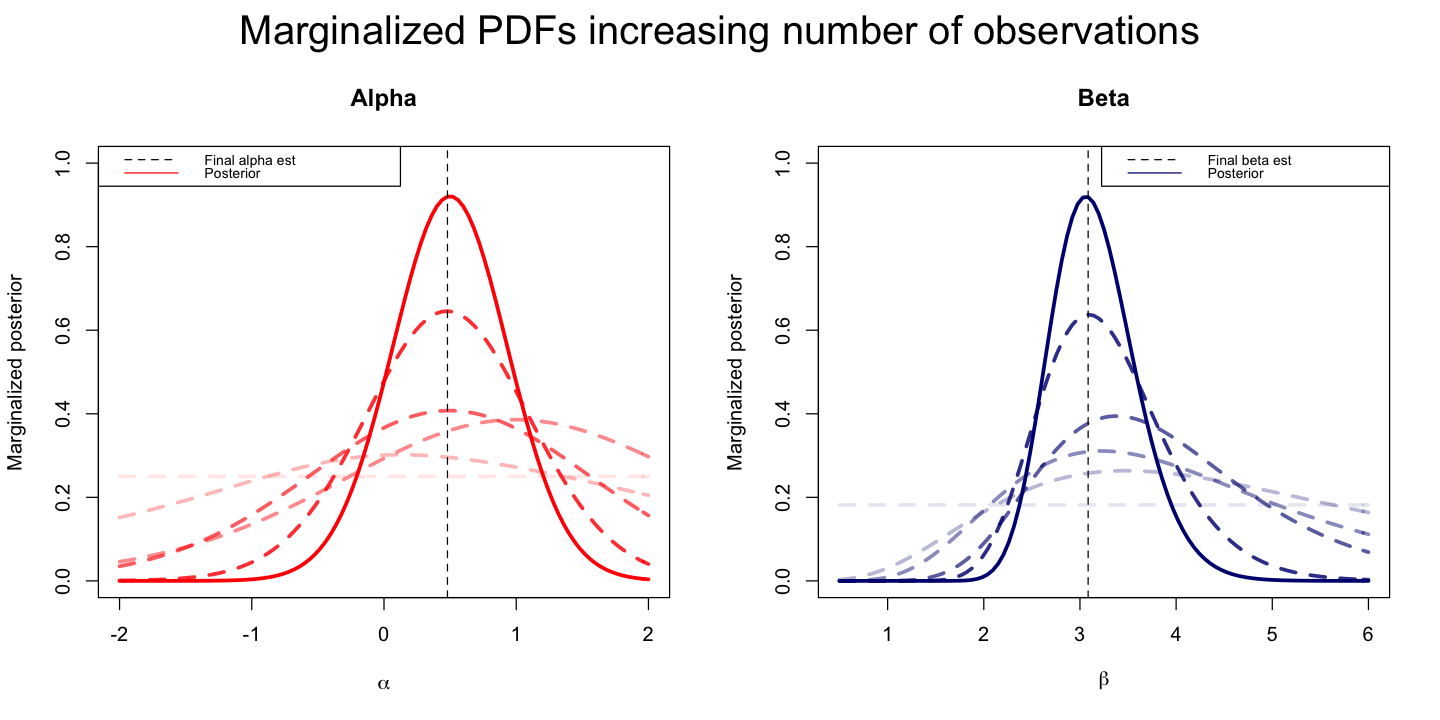

In [10]:
a.best = best.est.list[1,]
b.best = best.est.list[2,]

#Plot best params (mode) evolution
options(repr.plot.width=12, repr.plot.height=6)

par(mfrow=c(1,2), oma = c(0, 0, 2, 0))
plot(1:6,a.best,type='l', lwd='3', col = 'red', main = 'Alpha', xaxt='n', xlab='', ylab=expression(alpha))
abline(h=a.true, col='black',lty=2)

plot(1:6,b.best,type='l', lwd='3', col = 'navy', main = 'Beta', xaxt='n', xlab='', ylab=expression(beta))
abline(h=b.true, col='black',lty=2)
mtext('Modes evolution increasing number of observations', outer = TRUE, cex = 2)

a.post.list = matrix(a.post.list, nrow=len.a)
b.post.list = matrix(b.post.list, nrow=len.b)

#Plot marginalized PDFs
ylim = c(0,1)
col.strenght = seq(0.1,1,len=length(n.obs.list))

par(mfrow=c(1,2), oma = c(0, 0, 2, 0))
plot(A,a.post.list[,1],type='l',lwd=3,lty=2,col=adjustcolor("red",alpha.f=col.strenght[1]),
     ylim=ylim, main = 'Alpha', xlab=expression(alpha), ylab='Marginalized posterior')
for (n in 2:length(n.obs.list)){
    par(new=TRUE)   
    lty=2
    if (n==length(n.obs.list)){lty=1}
    plot(A,a.post.list[,n],type='l',lwd=3,lty=lty,col=adjustcolor("red",alpha.f=col.strenght[n]),
         ylim=ylim,axes=FALSE, ann=FALSE)
}
abline(v=A[which.max(a.post.list[,length(n.obs.list)])], col='black',lty=2)
legend('topleft', c('Final alpha est','Posterior'), col=c("black", "red"), lty=2:1, cex=0.7)

plot(B,b.post.list[,1],type='l',lwd=3,lty=2,col=adjustcolor("navy",alpha.f=col.strenght[1]),
     ylim=ylim, main = 'Beta', xlab=expression(beta), ylab='Marginalized posterior')
for (n in 2:length(n.obs.list)){
    par(new=TRUE)    
    lty=2
    if (n==length(n.obs.list)){lty=1}
    plot(B,b.post.list[,n],type='l',lwd=3,lty=lty,col=adjustcolor("navy",alpha.f=col.strenght[n]),
         ylim=ylim,axes=FALSE, ann=FALSE)
}
abline(v=B[which.max(b.post.list[,length(n.obs.list)])], col='black',lty=2)
legend('topright', c('Final beta est','Posterior'), col=c("black", "navy"), lty=2:1, cex=0.7)
mtext('Marginalized PDFs increasing number of observations', outer = TRUE, cex = 2)

The graphs above depict the evolution of the mode while increasing the number of observations (plots not in scale): after an initial uncertainty, the peak of the joint posterior focuses correctly around the true value.

In the last plots are shown the marginalized posteriors for $\alpha$ and $\beta$ for each number of obs (lighter colors correspond to fewer samples). Here again it is noticeable the evolution of such PDFs.

## Exercise 3 - Signal in presence of background noise

#### Framework definition

While working with data collected from experimental physics it is common to face problems in which the signal one wants to measure is affected by some background noise. For example, while trying to analyse light spectrum we measure the intensity (i.e, number of photons) in bins of wavelength or energy. The typical dataset in these cases is a set of counts $\left\{N_k \right\}_k$ detected at some positions $\left\{x_k \right\}_k$, where the photo-detectors are placed. The ultimate goal of this analysis is to assert if those observed counts belong to a signal by estimating the signal peak amplitude ($A$) and the background amplitude ($B$), so to calculate their ratio.

#### Model definition

The model for this phenomenon states that the expected number of photons for the detector at position $x_k$ is:

$$
S_k = \Delta t \left[A \cdot \exp\left( - \frac{{(x_k - x_0)}^2}{2w^2}\right) + B\right]
$$

Where $\Delta t$ is the exposure time and $x_0,w$ are the center and the width of the signal peak, respectively. The expression above will serve as a prior for the next computations.

Given an expected number of photons, the actual observations follow a Poissonian distribution of characteristic parameter $\mu \equiv S_k$:

$$
P(N|S(\pmb{\theta})) = \frac{S^Ne^{-S}}{N!}
$$

Where it is highlighted the dependence of $S$ on the whole set of parameters $\pmb{\theta} = (A,B,\Delta t, x_0, w)$. Hence, for $K$ independent measurements constituting the data ($D = \left\{N_k \right\}_k$) the likelihood becomes:

$$
P(D|\pmb{\theta},M) = \prod_k \frac{S_k^{N_k}e^{-{S_k}}}{N_k!}
$$

Where it is written explicitly the dependence on the model $M$.
Finally, to proceed to a concrete evaluation, in order to simplify the analysis let us assume that the parameters $\Delta t, x_0$ and $w$ are known. Hence, the goal will be the inference of $A$ and $B$.

As for the choice of the prior, in the maximum ignorance case it looks reasonable to assume a minimalistic one: the only constraint on those values is that, since they represent a amplitudes, they can only be non-negative values. Hence, let me define the following improper priors:

$$
P(A|M) = P(B|M) = \left\{\begin{array}{2} 1 & \mbox{ if } x \ge 0 \\ 0 & \mbox{ elsewhere } \end{array}\right.
$$

And given the fact that $A$ and $B$ are uncorrelated quantities it follows $P(A,B|M) = P(A|M)P(B|M)$. 
As a result, the posterior given by Bayes' theorem is:

$$
P(A,B | D,M) = P(D|A,B,M) \cdot P(A,B|M) = \frac{1}{Z}\prod_k \frac{S_k^{N_k}e^{-{S_k}}}{N_k!}
$$

Where $S_k = S_k(A,B)$ and $Z$ is the suitable normalization factor. Like for the previous exercise, it looks convenient to calculate the logarithm of the likelihood:

$$
L := \log\left(P(A,B | D,M)\right) = \log\left(\prod_k \frac{S_k^{N_k}e^{-{S_k}}}{N_k!}\right) + C = 
\sum_k \log\left(\frac{S_k^{N_k}e^{-{S_k}}}{N_k!}\right) + C
$$

The constant term C is independent from $A$ and $B$. Again, the posterior can finally be obtained by taking the exponential and adjusting the normalization.

Given the Signal over Background example described above, analyze and discuss the following cases: 

#### A. Vary the sample resolution $w$ used to generate the data, keeping the same sampling range: $w \in \{0.1,0.25,1,2,3\} $ and check the effect on the results.


In [11]:
#Function to generate signal at position x.
signal_generator <- function(x, B, AB.ratio, x0, w, Dt){
    
    A = B*AB.ratio
    signal = Dt*(A*exp(-(x-x0)^2/(2*w^2))+B)
    
}

#Model params
x0 = 0
w = 1
Dt = 5
b.true = 1
r.true = 3

#Redefine function with archoded params
signal <- pryr::partial(signal_generator,B = b.true, AB.ratio = r.true, x0=x0, Dt=Dt)

#Funciton to plot observations
plotter <- function(x.data,w,main){
    
    #Generate observed data
    s.true <- signal(x.data,w)
    sim.data <- rpois(length(s.true),s.true)
    
    x.plot = seq(min(x.data),max(x.data),0.05*w)
    s.plot = signal(x.plot,w)
    plot(x.plot,s.plot,xlab='x',ylab='Signal + background counts',type='l',
         col='navy',lwd=2,lty=2,main=main,cex.main=1.8,cex.lab=1.5)
    par(new=TRUE)
    x.data.off = x.data - 0.25
    plot(x.data.off,sim.data,type='s',col='firebrick3',lwd=2,xlim=range(x.plot),
         ylim=range(c(s.plot,sim.data)),axes=FALSE, ann=FALSE)
}

Registered S3 method overwritten by 'pryr':
  method      from
  print.bytes Rcpp



#### Display data

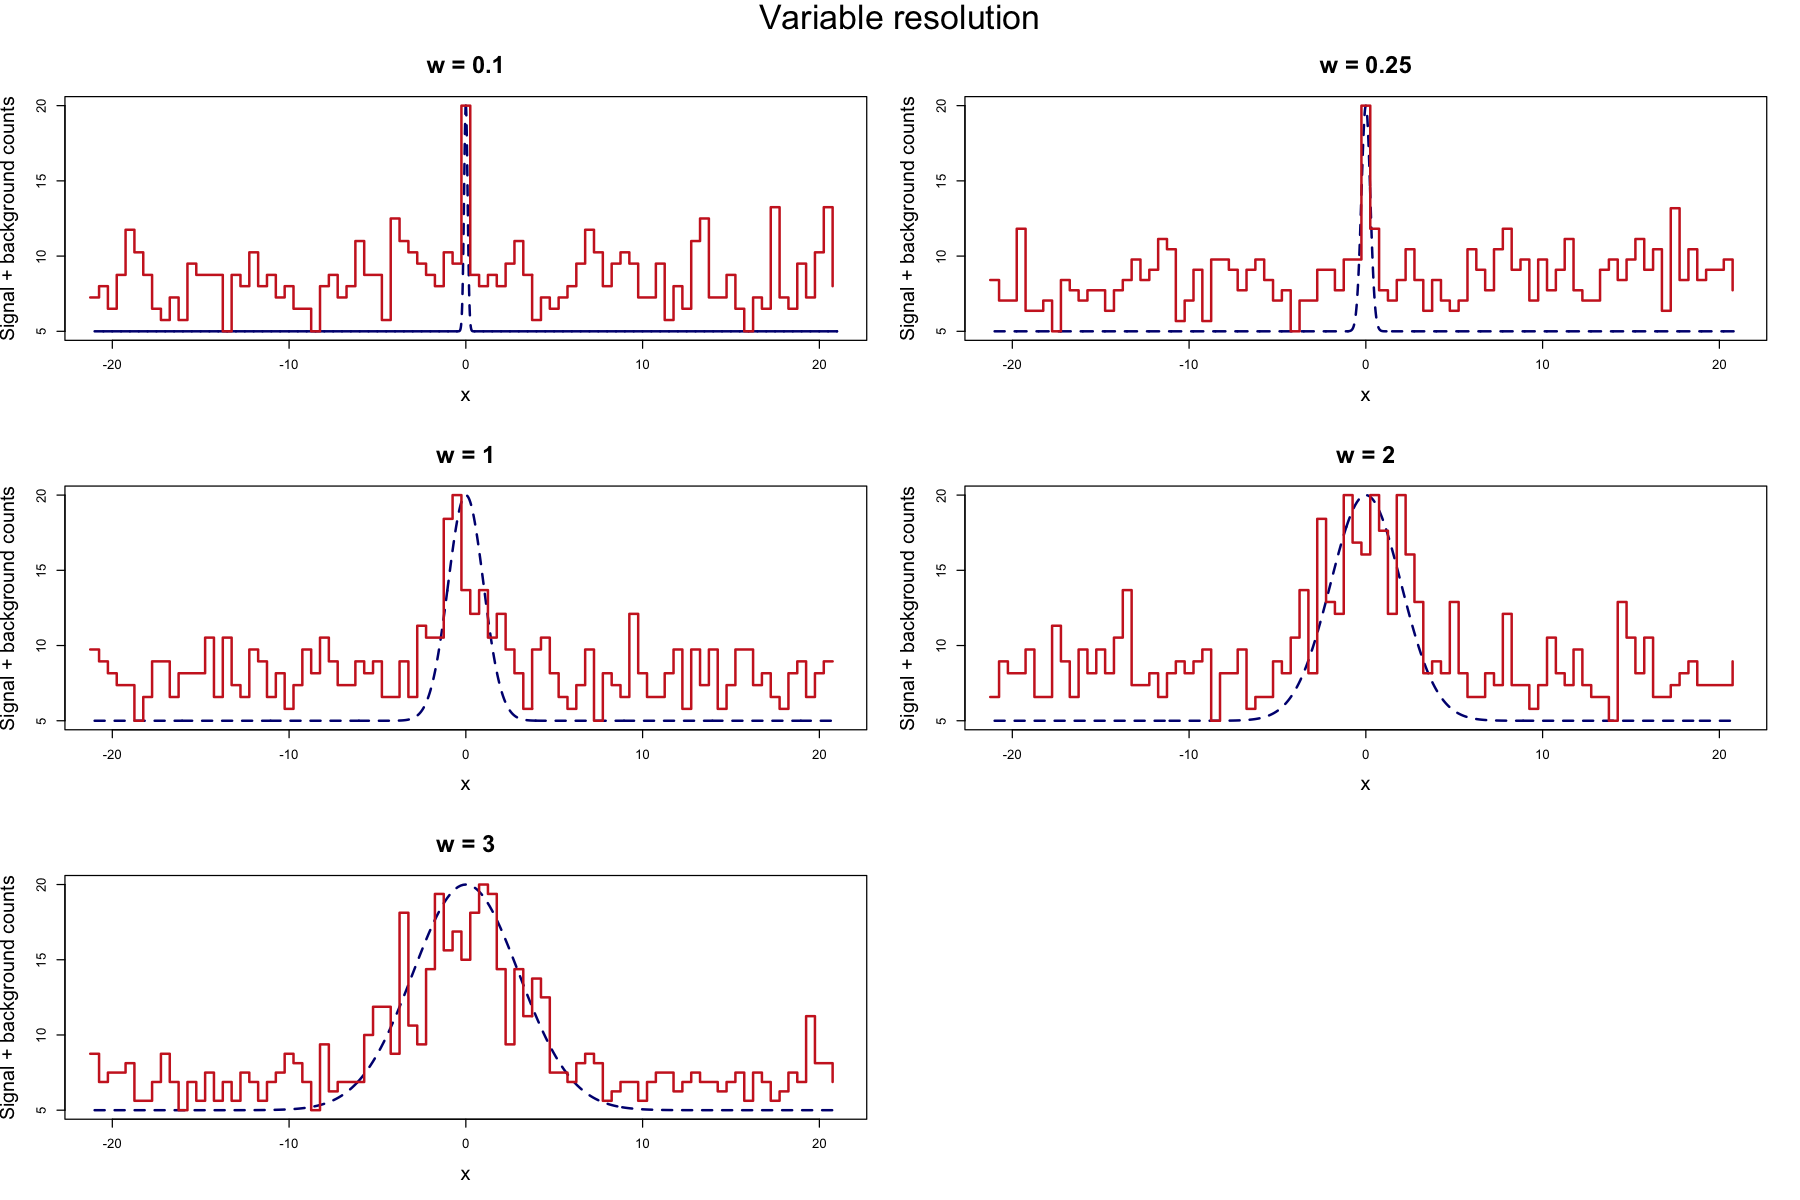

In [12]:
set.seed(2024286)

#Variable resolution
w.list = c(0.1,0.25,1,2,3)
w.min = min(w.list)
w.max = max(w.list)

#Detector positions
x.data = seq(-7*w.max,7*w.max,0.5)   

options(repr.plot.width=15, repr.plot.height=10)
par(mfrow=c(3,2), oma = c(0, 0, 2, 0))
for (w in w.list){
   main = paste('w =',w)
    plotter(x.data,w,main) 
}
mtext('Variable resolution', outer = TRUE, cex = 1.7)

Here are reported the generated samples on the same range for different values of resolution. We can see that while the resolution is very narrow the signal is well focused in a single histogram bin, while if the signal spreads it becomes visible on multiple bins. In this case, the signal-to-noise ratio is 3.

In [13]:
#Function to calculate the log.posterior
log.post <- function(sim.data,x.data,B,AB.ratio,x0,w,Dt){
    
    lambda = signal_generator(x=x.data, B=B, AB.ratio=AB.ratio, x0=x0, w=w, Dt=Dt)
    sum(dpois(sim.data,lambda,log=TRUE))
    
}

#Function to estimate the mean and std.dev
mean.estimator <- function(x,post,dx){
    mean = sum(x*post)*dx
    std.dev = sqrt(sum(post*(x-mean)^2)*dx)
    result = c(mean,std.dev)
}

#Function to calculate the covariance
covariance.estimator <- function(A,mean.a,sigma.a,da,B,mean.b,sigma.b,db,post){
    rho = 0
    for (i in length(A)){
        for (j in length(B)){
            rho = rho + (A[i]-mean.a)*(B[j]-mean.b)*post[i,j]
        }
    }
    rho = da*db*rho/(sigma.a*sigma.b)
}

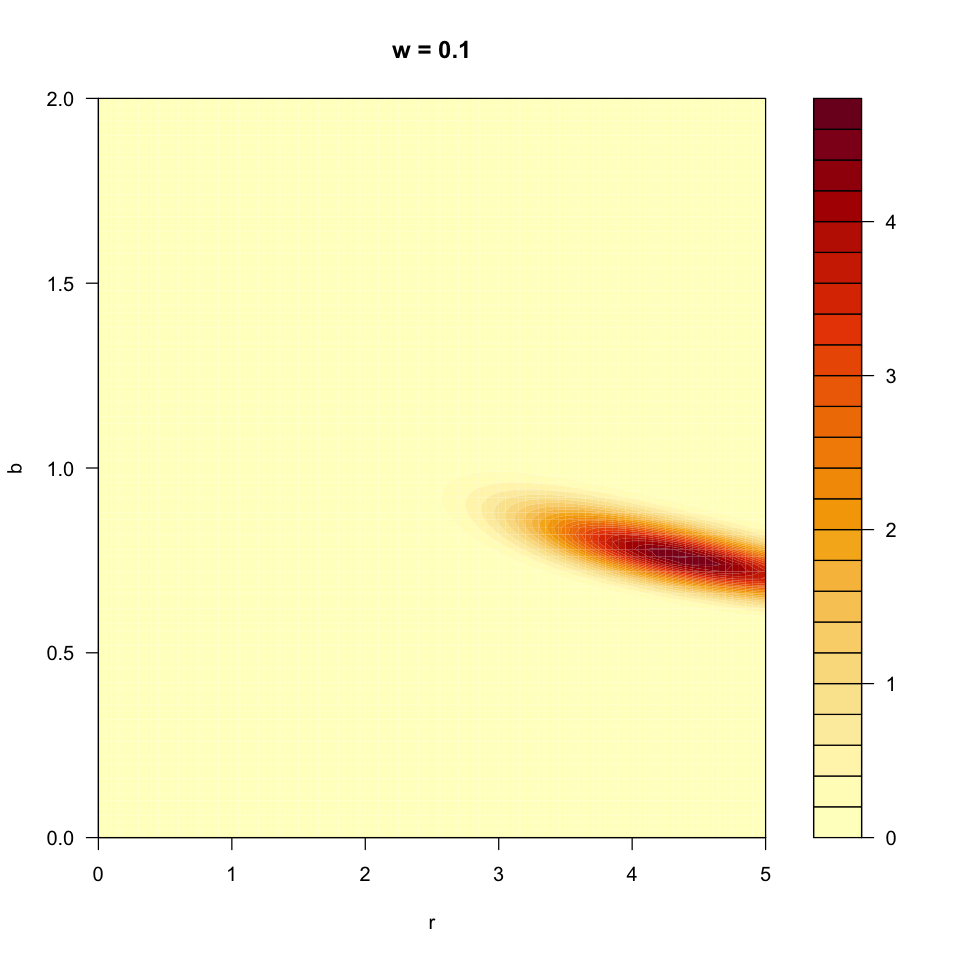

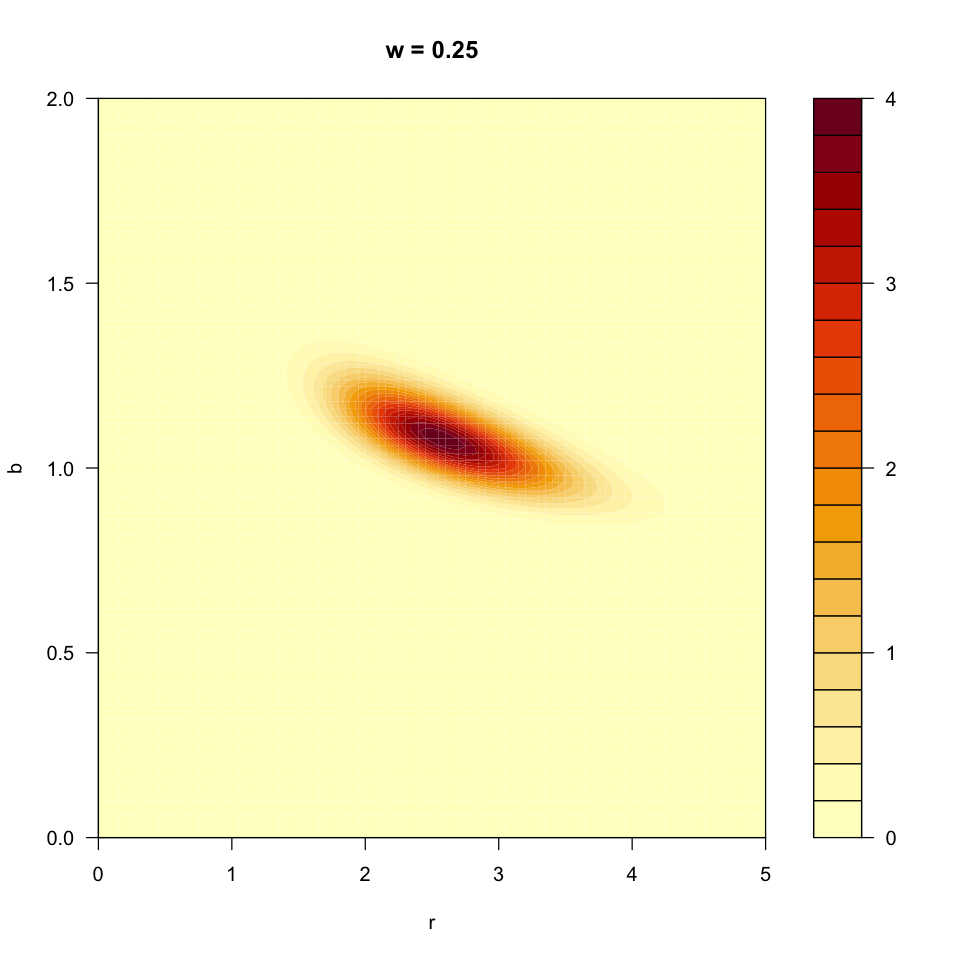

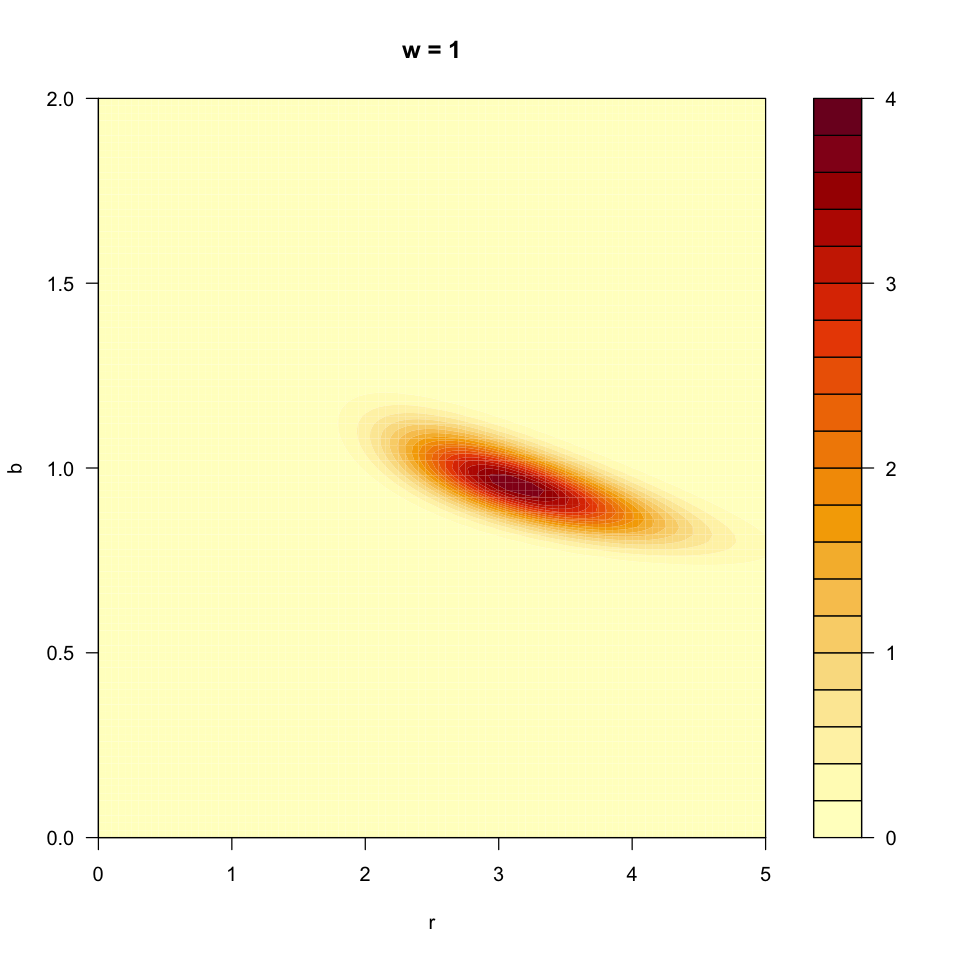

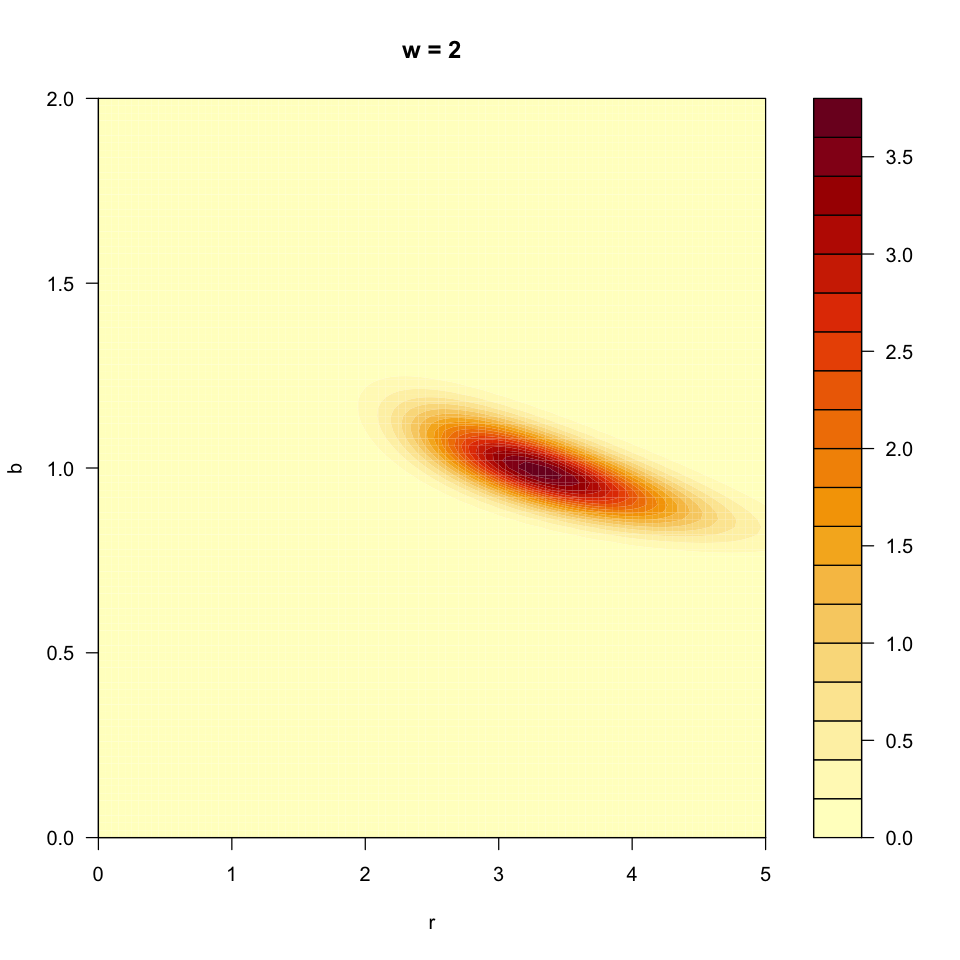

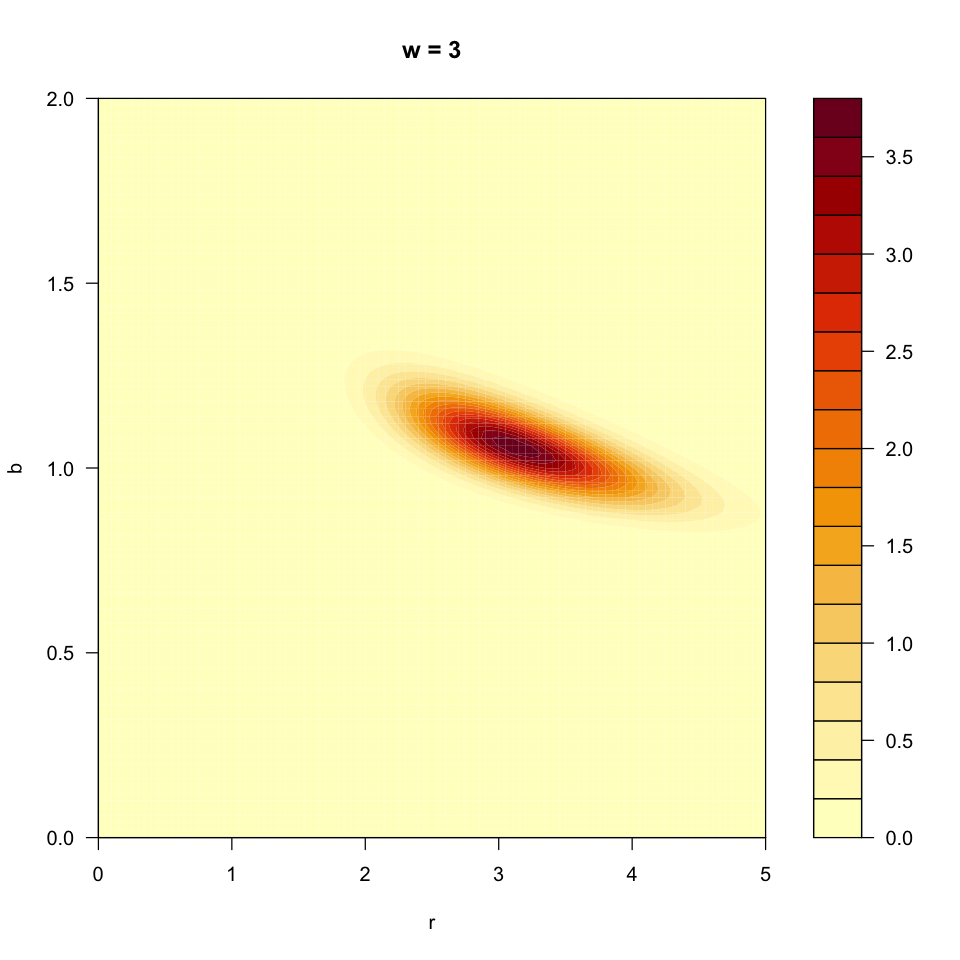

In [14]:
set.seed(2024286)
options(repr.plot.width=8, repr.plot.height=8)

#Prior distributions (b and ratio r)
r.min = 0
r.max = 5
len.r = 101
dr = (r.max-r.min)/len.r
R = seq(r.min,r.max,len=len.r)
b.min = 0
b.max = 2
len.b = 101
db = (b.max-b.min)/len.b
B = seq(b.min,b.max,len=len.b)

r.prior = 1/(r.max-r.min)
b.prior = 1/(b.max-b.min)


#Loop over w
best.est.list <- vector()
rho.list <- vector()
r.post.list <- vector() 
b.post.list <- vector() 

for (w in w.list){
    
    x.data = seq(-7*w,7*w,0.5*w)
    s.true <- signal(x.data,w)
    sim.data <- rpois(length(s.true),s.true)
    
    L.matrix <- vector()

    for (r in R){
        for (b in B){
            L = log.post(sim.data,x.data,b,r,x0,w,Dt)
            L.matrix <- cbind(L.matrix,L)
        }
    }
    
    #From L to Posterior (on the grid)
    post.matrix <- exp(L.matrix)/(sum(exp(L.matrix))*dr*db)
    post.matrix <- matrix(post.matrix, nrow = len.r, byrow = TRUE)
    
    #Save best params estimations and plot
    r.post = rowSums(post.matrix)*db
    r.mean = mean.estimator(R,r.post,dr)[1]
    r.std.dev = mean.estimator(R,r.post,dr)[2]
    b.post = colSums(post.matrix)*dr
    b.mean = mean.estimator(B,b.post,db)[1]
    b.std.dev = mean.estimator(B,b.post,db)[2]
    best.est.list <- cbind(best.est.list,c(r.mean,r.std.dev,b.mean,b.std.dev))
    rho.list <- cbind(rho.list, covariance.estimator(R,r.mean,r.std.dev,dr,B,b.mean,b.std.dev,db,post.matrix))
    r.post.list <- cbind(r.post.list,r.post)
    b.post.list <- cbind(b.post.list,b.post)
    filled.contour(R, B, post.matrix, plot.title = title(main = paste('w =', w), 
                    xlab='r',  ylab='b'))

}

The plots above show how the posterior changes while varying the signal generated by different widths. Up to some difficulties in determining the best ratio due to the large amount of bins in the signal histogram, we can see how the posteriors are overall quite aligned.

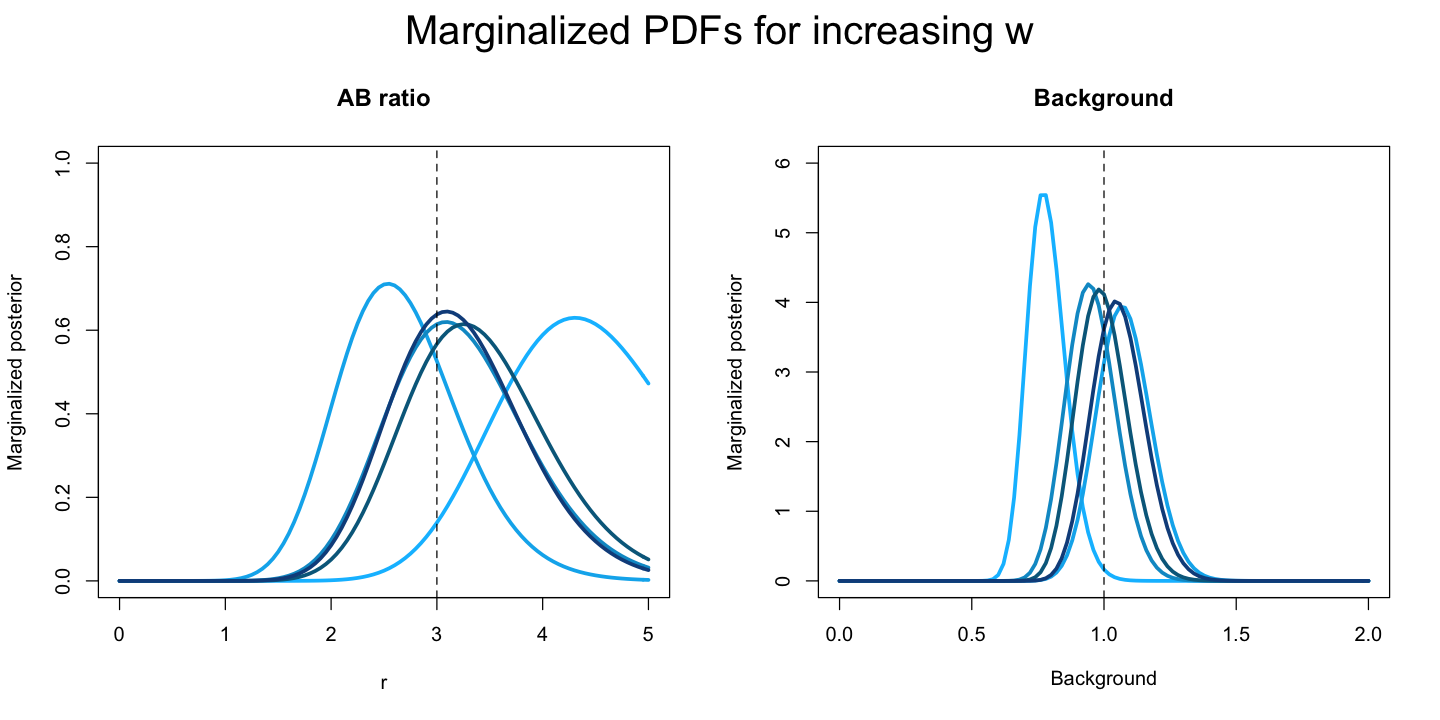

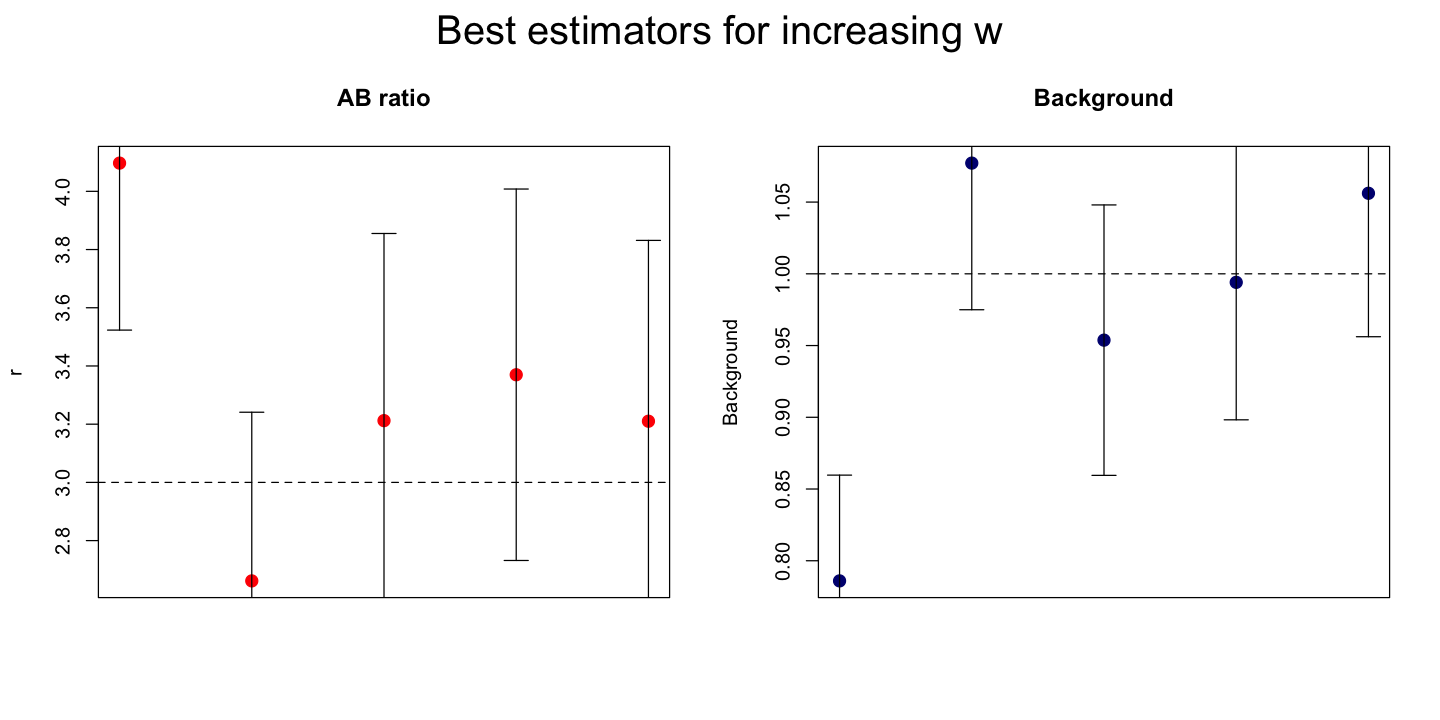

In [15]:
r.means = best.est.list[1,]
r.std.devs = best.est.list[2,]
b.means = best.est.list[3,]
b.std.devs = best.est.list[4,]

#Plot marginalized posteriors
colors <- c('deepskyblue1','deepskyblue2','deepskyblue3','deepskyblue4','dodgerblue4')
options(repr.plot.width=12, repr.plot.height=6)

ylim = c(0,1)
par(mfrow=c(1,2), oma = c(0, 0, 2, 0))
plot(R,r.post.list[,1],type='l',lwd=3,lty=1,col=colors[1],
     ylim=ylim, main = 'AB ratio', xlab='r', ylab='Marginalized posterior')
for (n in 2:length(w.list)){
    par(new=TRUE)   
    plot(R,r.post.list[,n],type='l',lwd=3,lty=1,col=colors[n],
         ylim=ylim,axes=FALSE, ann=FALSE)
}
abline(v=r.true, col='black',lty=2)

ylim = c(0,6)
plot(B,b.post.list[,1],type='l',lwd=3,lty=1,col=colors[1],
     ylim=ylim, main = 'Background', xlab=expression(Background), ylab='Marginalized posterior')
for (n in 2:length(w.list)){
    par(new=TRUE)    
    plot(B,b.post.list[,n],type='l',lwd=3,lty=1,col=colors[n],
         ylim=ylim,axes=FALSE, ann=FALSE)
}
abline(v=b.true, col='black',lty=2)
mtext('Marginalized PDFs for increasing w', outer = TRUE, cex = 2)


#Plot best params (mean)
par(mfrow=c(1,2), oma = c(0, 0, 2, 0))
plot(1:5,r.means,pch=20,cex=2, col = 'red', main = 'AB ratio', xaxt='n', xlab='', ylab='r')
arrows(x0=1:5, y0=r.means-r.std.devs, x1=1:5, y1=r.means+r.std.devs, code=3, angle=90, length=.1)
abline(h=r.true, col='black',lty=2)

plot(1:5,b.means,pch=20,cex=2, col = 'navy', main = 'Background', xaxt='n', xlab='', ylab=expression(Background))
arrows(x0=1:5, y0=b.means-b.std.devs, x1=1:5, y1=b.means+b.std.devs, code=3, angle=90, length=.1)
abline(h=b.true, col='black',lty=2)
mtext('Best estimators for increasing w', outer = TRUE, cex = 2)

r.post.list = matrix(r.post.list, nrow=len.r)
b.post.list = matrix(b.post.list, nrow=len.b)

The plots above depict the marginalized posteriors for increasign values of $w$ (according to the color): we can see that after a sufficiently large $w$ the posteriors are peaked close to the true values. This is porbably due to a suboptimal binning of the signal. 

The last plots instead report the mean value of the marginalized posterior together with the standard deviation (square root of the expectation value of the second momentum). For the larger $w$s the estimations are compatible with the true values up to one $\sigma$.


#### B. Change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior) and check the effect on the results.

Let me now change the scenario: from the previous case, I fix $w=1$ and assume that also the ratio $r$ between $A$ and $B$ is a fixed and known. The problem thus changes and becomes a single parameter estimation (the background $B$ from which it is straightforward to estimate the signal amplitude).

As for the theoretical part, all the argumenations made above remain valid: in this case there will only be one flat prior for $B\sim\mathcal{U}(0,1)$ and the posterior will be uni-dimensional.

In [16]:
#Function to plot the results
plotter <- function(x.data,w,main){
    
    s.true <- signal(x.data,r)
    sim.data <- rpois(length(s.true),s.true)

    x.plot = seq(min(x.data),max(x.data),0.05*w)
    s.plot = signal(x.plot,w)
    plot(x.plot,s.plot,xlab='x',ylab='Signal + background counts',type='l',
         col='navy',lwd=2,lty=2,main=main,cex.main=1.8,cex.lab=1.5)
    par(new=TRUE)
    x.data.off = x.data - 0.25
    plot(x.data.off,sim.data,type='s',col='firebrick3',lwd=2,xlim=range(x.plot),
         ylim=range(c(s.plot,sim.data)),axes=FALSE, ann=FALSE)
}

#### Data visualization

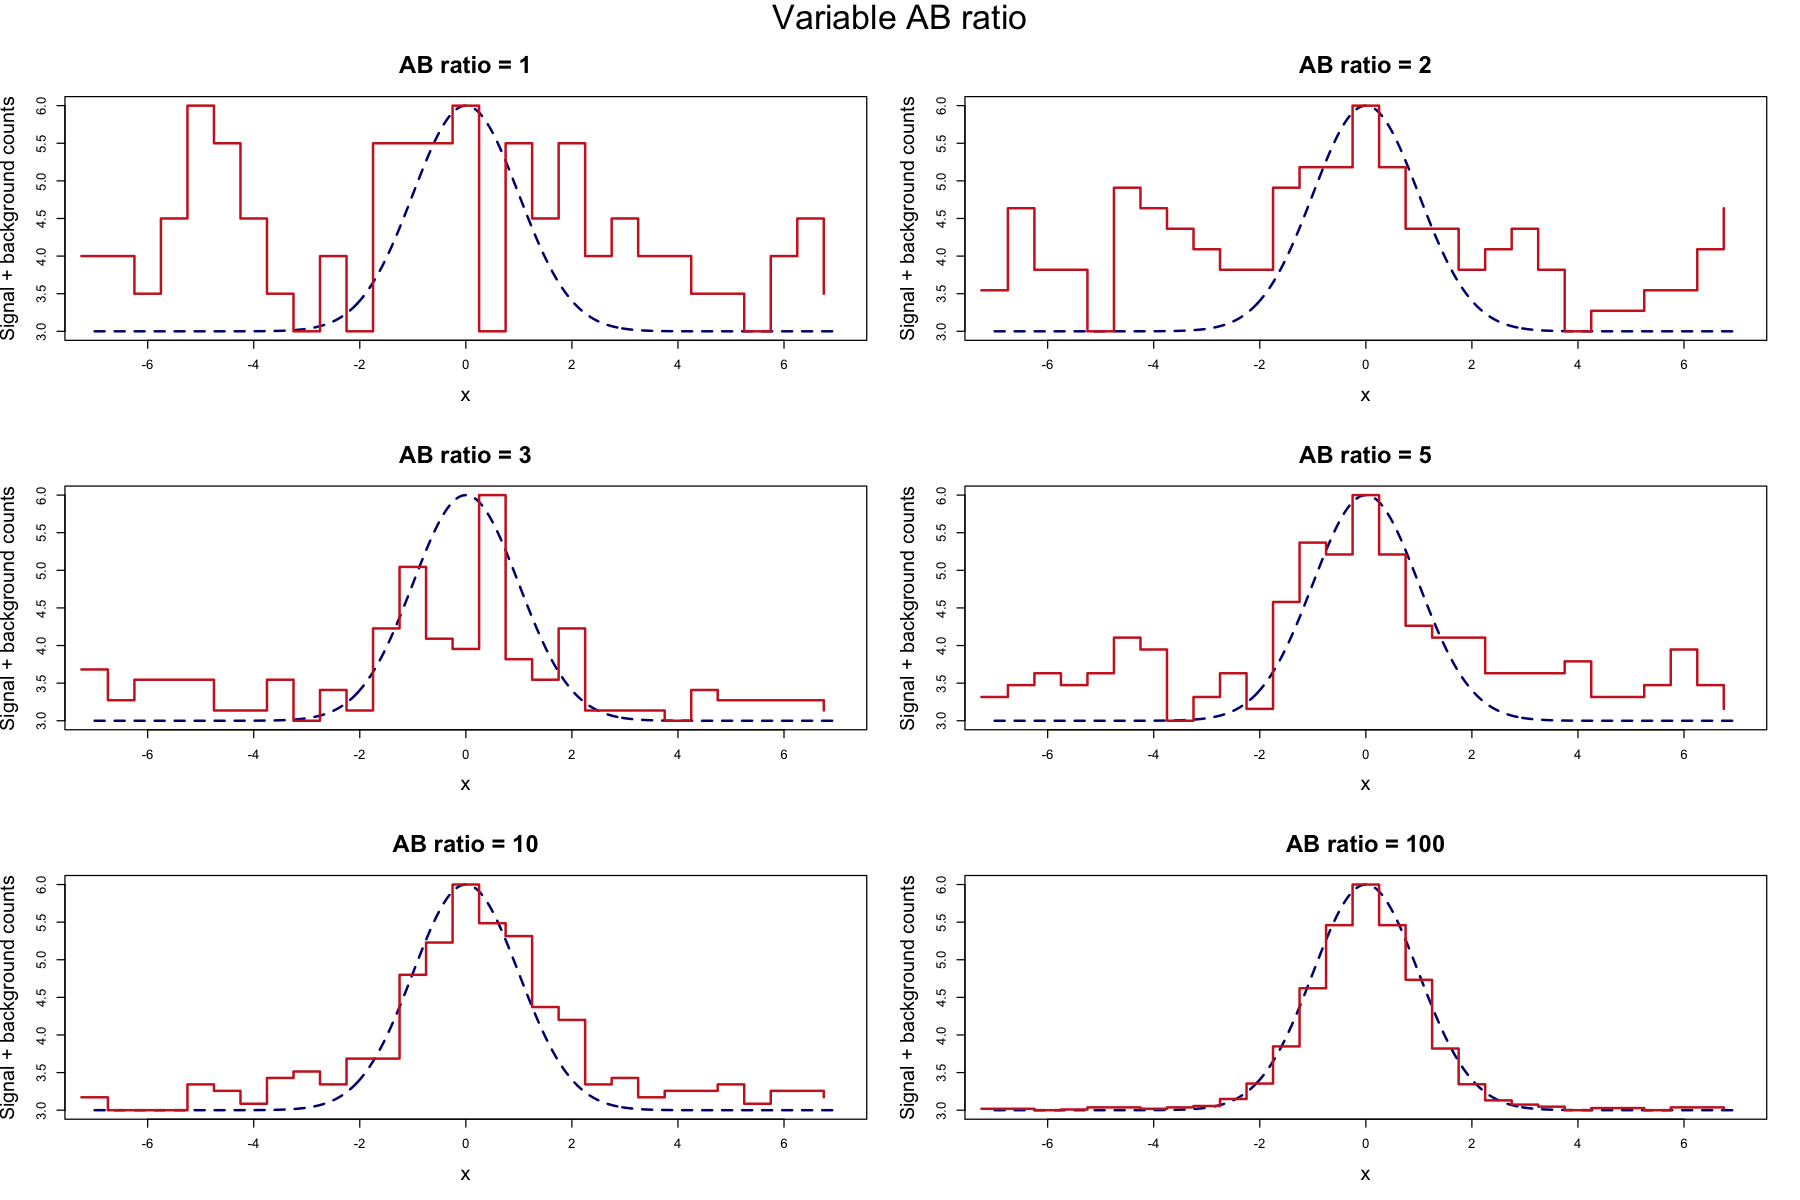

In [17]:
set.seed(2024286)

#Define list of ratios
ratio.list = c(1,2,3,5,10,100)
r.min = min(ratio.list)
r.max = max(ratio.list)

#Define data generator
b.true=0.6
x0=0
w=1
Dt=5
signal <- pryr::partial(signal_generator,B = b.true, x0=x0, w=w, Dt=Dt)

#Detector positions
x.data = seq(-7*w,7*w,0.5)   

options(repr.plot.width=15, repr.plot.height=10)
par(mfrow=c(3,2), oma = c(0, 0, 2, 0))
for (r in ratio.list){
    main = paste('AB ratio =',r)
    plotter(x.data,w,main) 
}
mtext('Variable AB ratio', outer = TRUE, cex = 1.7)

As one can see from the plots above, if the ratio between signal and noise is too small the signal cannot be correcly seen. On the other hand, if the ratio explodes the observed data will describe a cristal clear shape.

In [18]:
#Grid of parameters to investigate
b.min = 0
b.max = 1
len.b = 101
db = (b.max-b.min)/len.b
B = seq(b.min,b.max,len=len.b)

post <- vector()
best <- vector()
x.data = seq(-7*w,7*w,0.5*w)

#Iterate over different ratios
for (r in ratio.list){
    
    s.true <- signal(x.data,r)
    sim.data <- rpois(length(s.true),s.true)
    
    L.list <- vector()
    
    #Update log.posterior matrix
    for (b in B){
            L = log.post(sim.data,x.data,b,r,x0,w,Dt)
            L.list <- append(L.list, L)
        }
    p = exp(L.list)/(sum(exp(L.list))*db)
    best <- cbind(best,mean.estimator(B,p,db))
    post <- cbind(post,p)
}

mean = best[1,]
std.dev = best[2,]

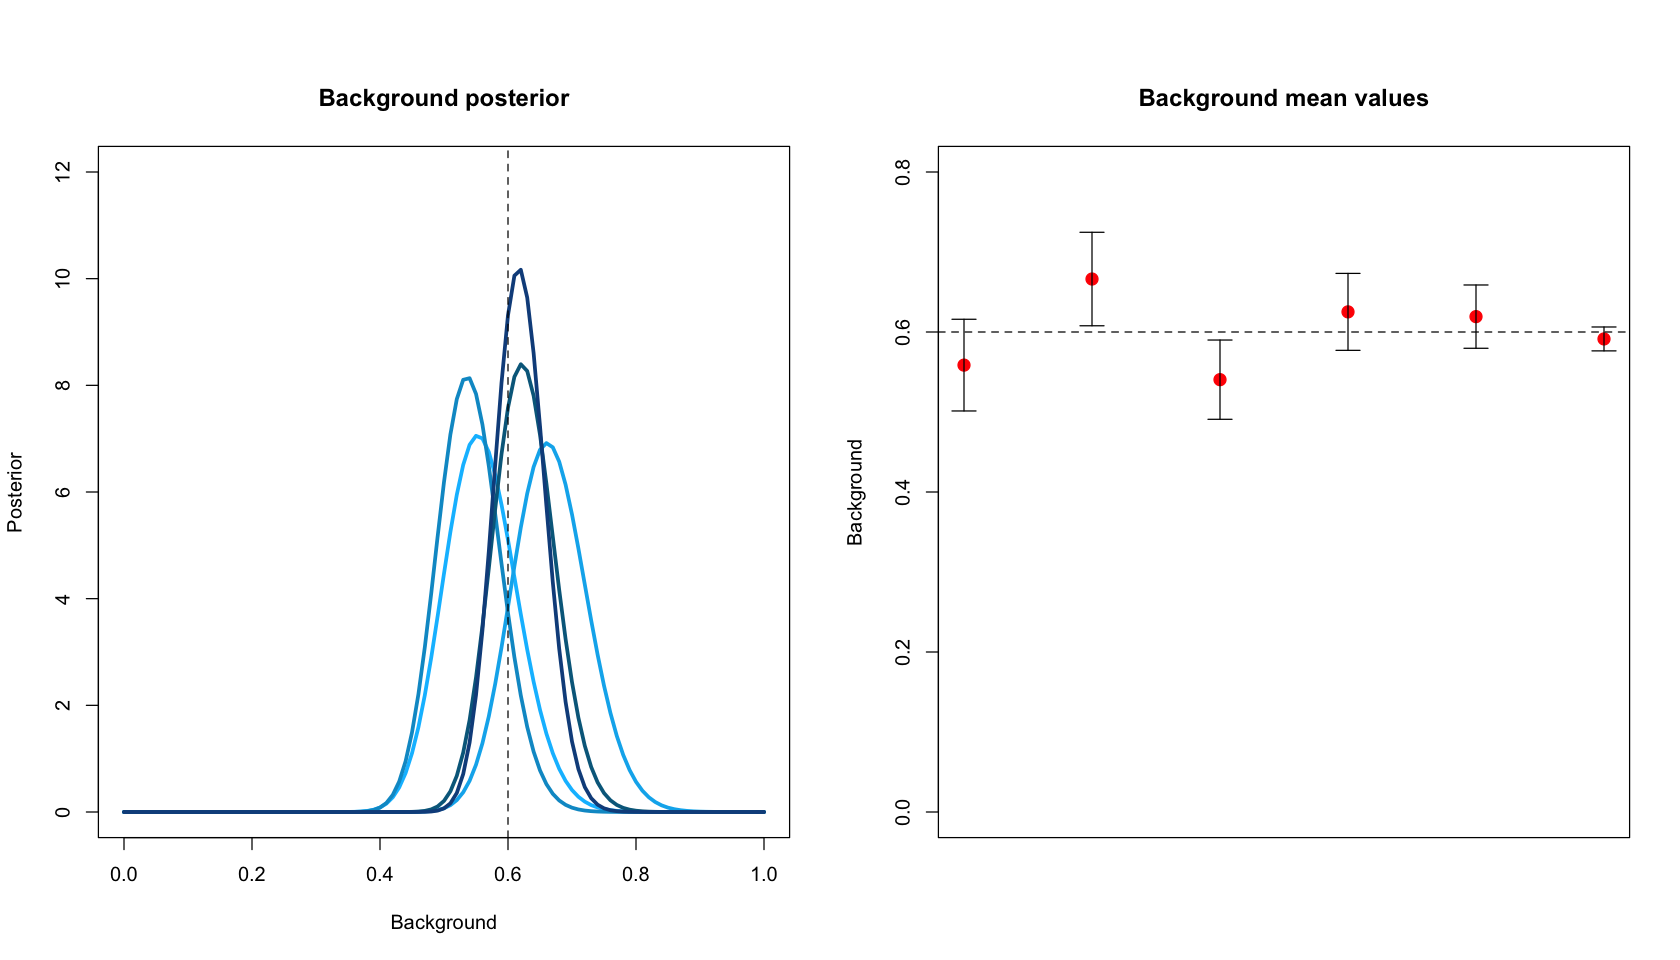

In [19]:
#Plot posteriors
colors <- c('deepskyblue1','deepskyblue2','deepskyblue3','deepskyblue4','dodgerblue4')


options(repr.plot.width=14, repr.plot.height=8)
ylim = c(0,12)
par(mfrow=c(1,2), oma = c(0, 0, 2, 0))
plot(B,post[,1],type='l',lwd=3,lty=1,col=colors[1],
     ylim=ylim, main = 'Background posterior', xlab='Background', ylab='Posterior')
for (n in 2:length(ratio.list)){
    par(new=TRUE)   
    plot(B,post[,n],type='l',lwd=3,lty=1,col=colors[n],
         ylim=ylim,axes=FALSE, ann=FALSE)
}
abline(v=b.true, col='black',lty=2)

plot(1:length(ratio.list),mean,pch=20,cex=2,ylim=c(0,.8), col = 'red', main = 'Background mean values', 
     xaxt='n', xlab='', ylab='Background')
arrows(x0=1:length(ratio.list), y0=mean-std.dev, x1=1:length(ratio.list), y1=mean+std.dev, 
       code=3, angle=90, length=.1)
abline(h=b.true, col='black',lty=2)

As expected, the plots above confirm how increasing the value of $r$ (clearer signal) helps the posterior to narrow on the true value (darker curves). On the right handside it is shown how for larger ratios the uncertainty drops, while the mean values are always less than one $\sigma$ close to the true value.